In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io # Diperlukan untuk membaca data string jika file diakses dari memori
import math # Untuk perhitungan ukuran grid subplot

# Load the dataset
file_path = "/content/Rekrutmen data - recruitment_data.csv"
df = pd.read_csv(file_path)

# Show the first few rows and summary
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


(   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
 0   26       1               2                0                  3   
 1   39       1               4               12                  3   
 2   48       0               2                3                  2   
 3   34       1               2                5                  2   
 4   30       0               1                6                  1   
 
    DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
 0            26.783828              48          78                91   
 1            25.862694              35          68                80   
 2             9.920805              20          67                13   
 3             6.407751              36          27                70   
 4            43.105343              23          52                85   
 
    RecruitmentStrategy  HiringDecision  
 0                    1               1  
 1                    2               1  
 2    

In [5]:
df.head(4)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0


In [6]:
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")
print(f"Jumlah baris yang hilang (missing value): {df.isnull().any(axis=1).sum()}")


Jumlah baris duplikat: 0
Jumlah baris yang hilang (missing value): 0


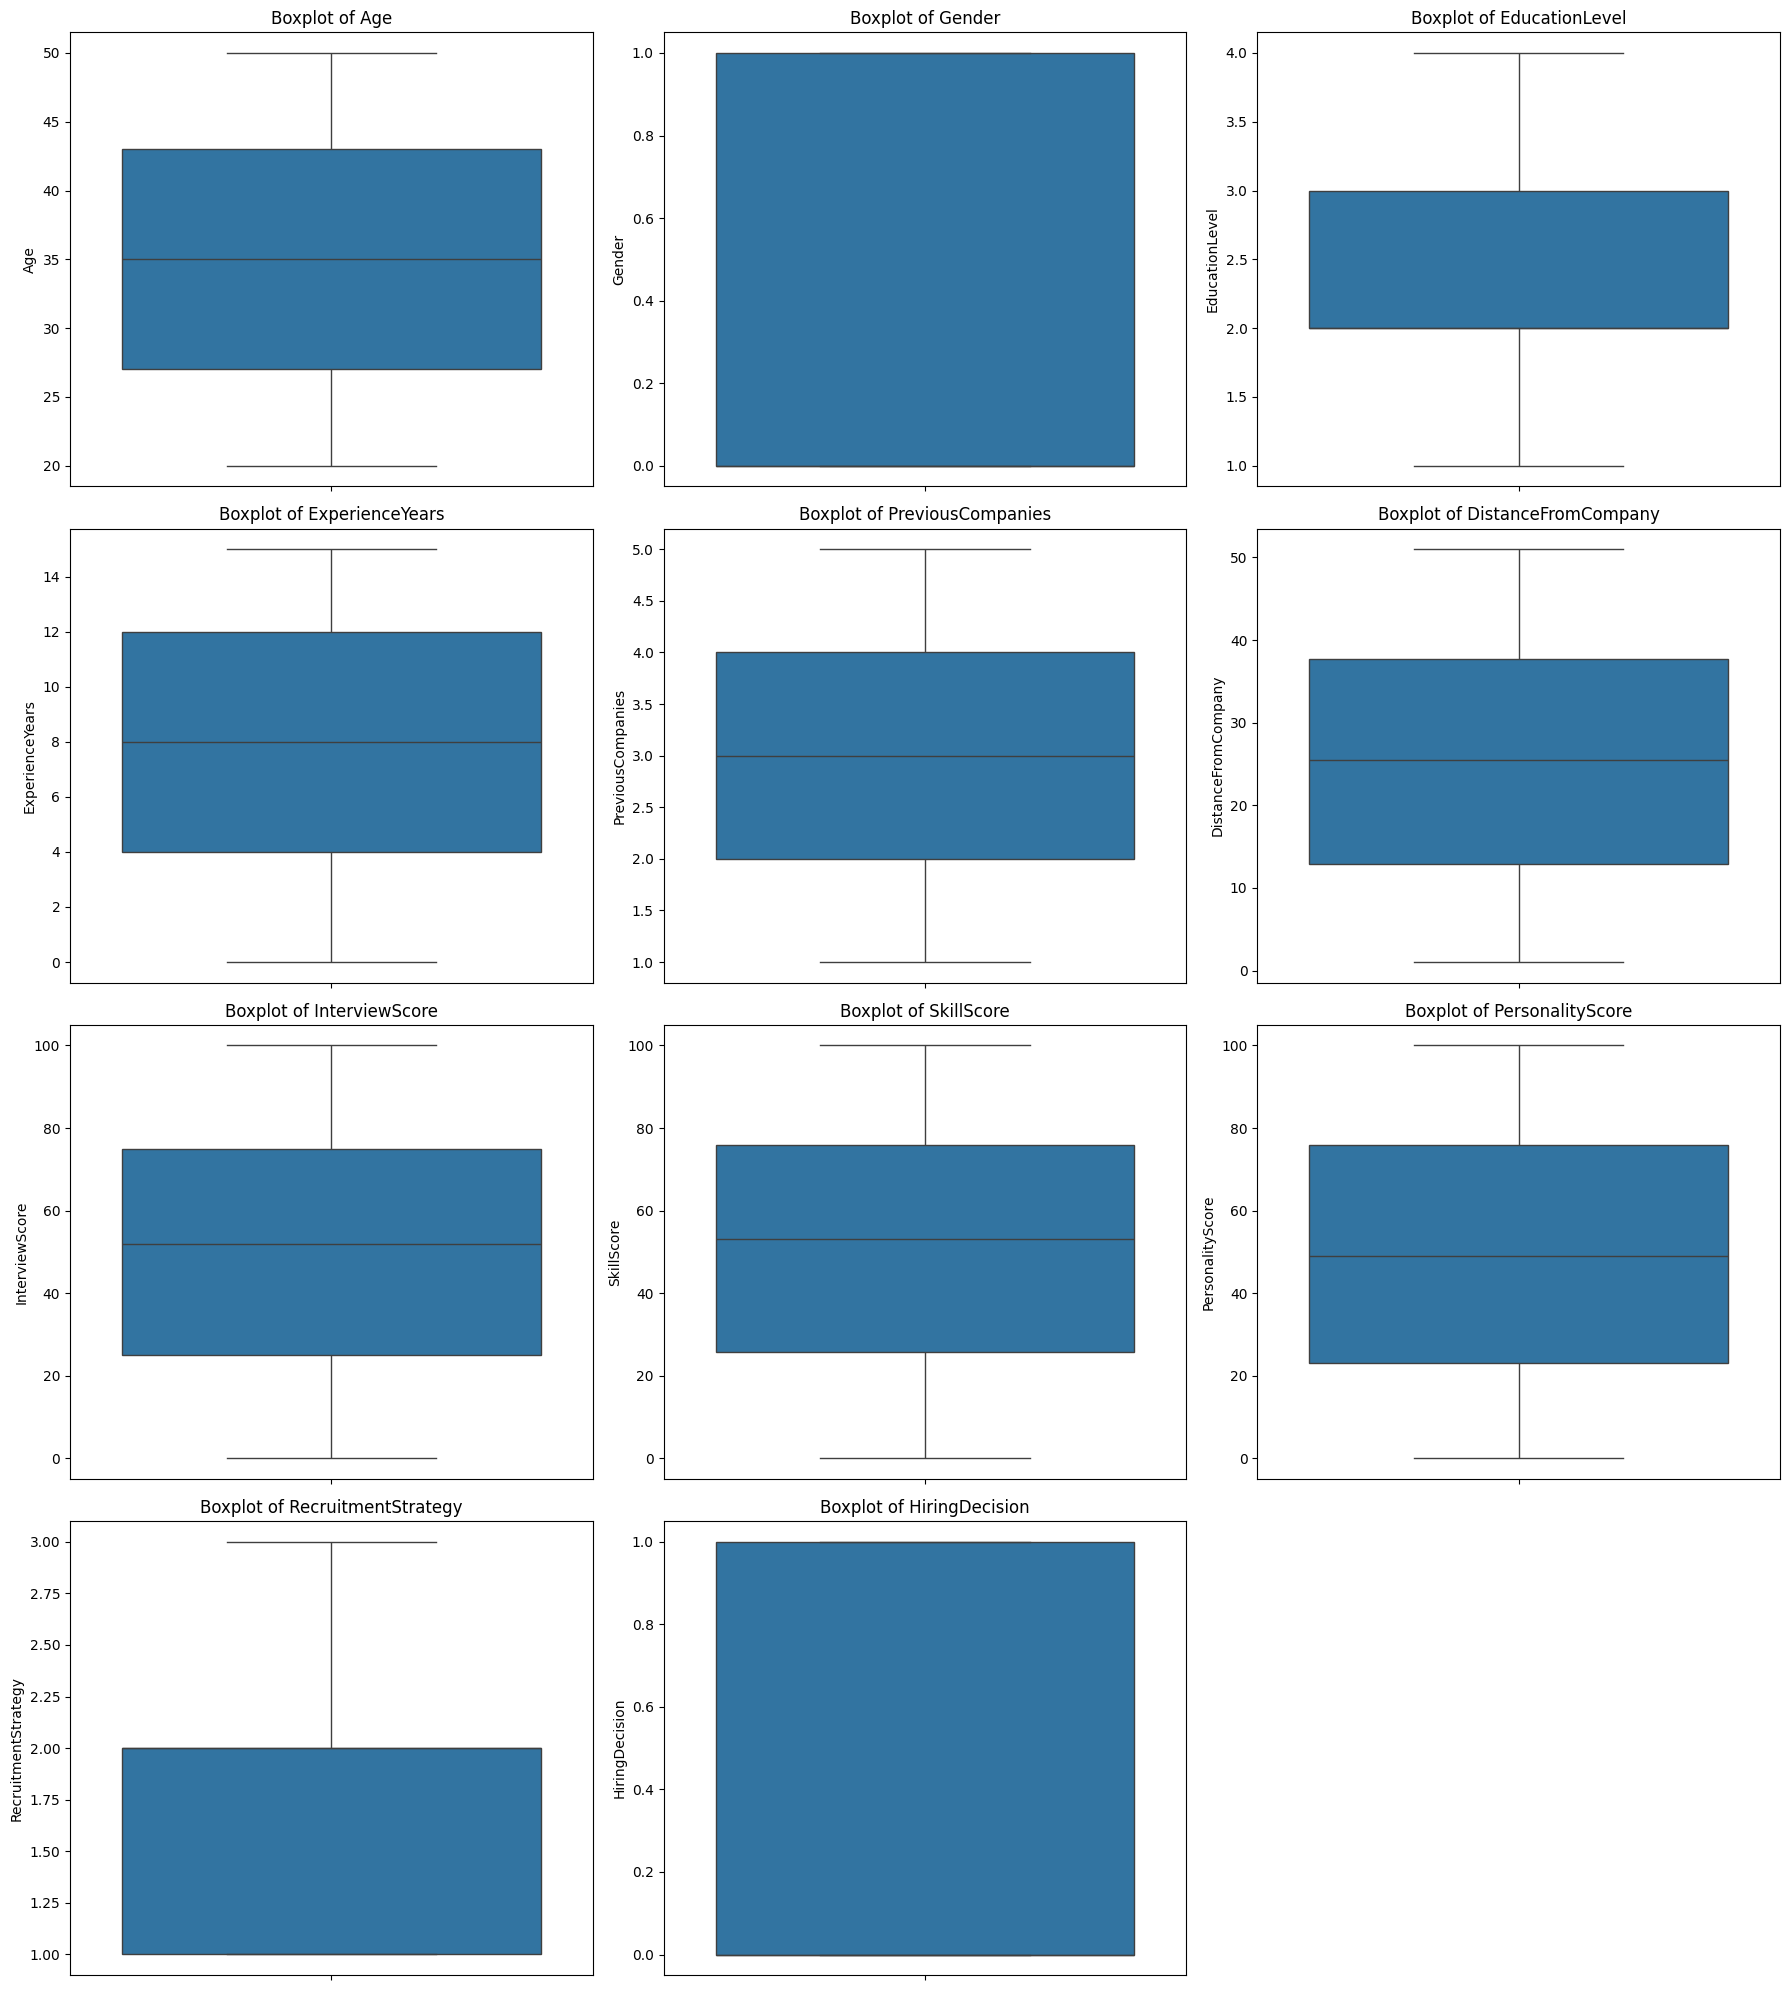

In [7]:
# prompt: make a boxplot for each collumn

import matplotlib.pyplot as plt
# Determine the number of columns to plot
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_plots = len(num_cols)

# Calculate grid size for subplots
cols_per_row = 3 # You can adjust this number
rows_per_plot = math.ceil(num_plots / cols_per_row)

# Create subplots
fig, axes = plt.subplots(rows_per_plot, cols_per_row, figsize=(cols_per_row * 6, rows_per_plot * 5))
axes = axes.flatten() # Flatten the array of axes for easier iteration

# Create boxplots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('') # Remove x-axis label for clarity

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

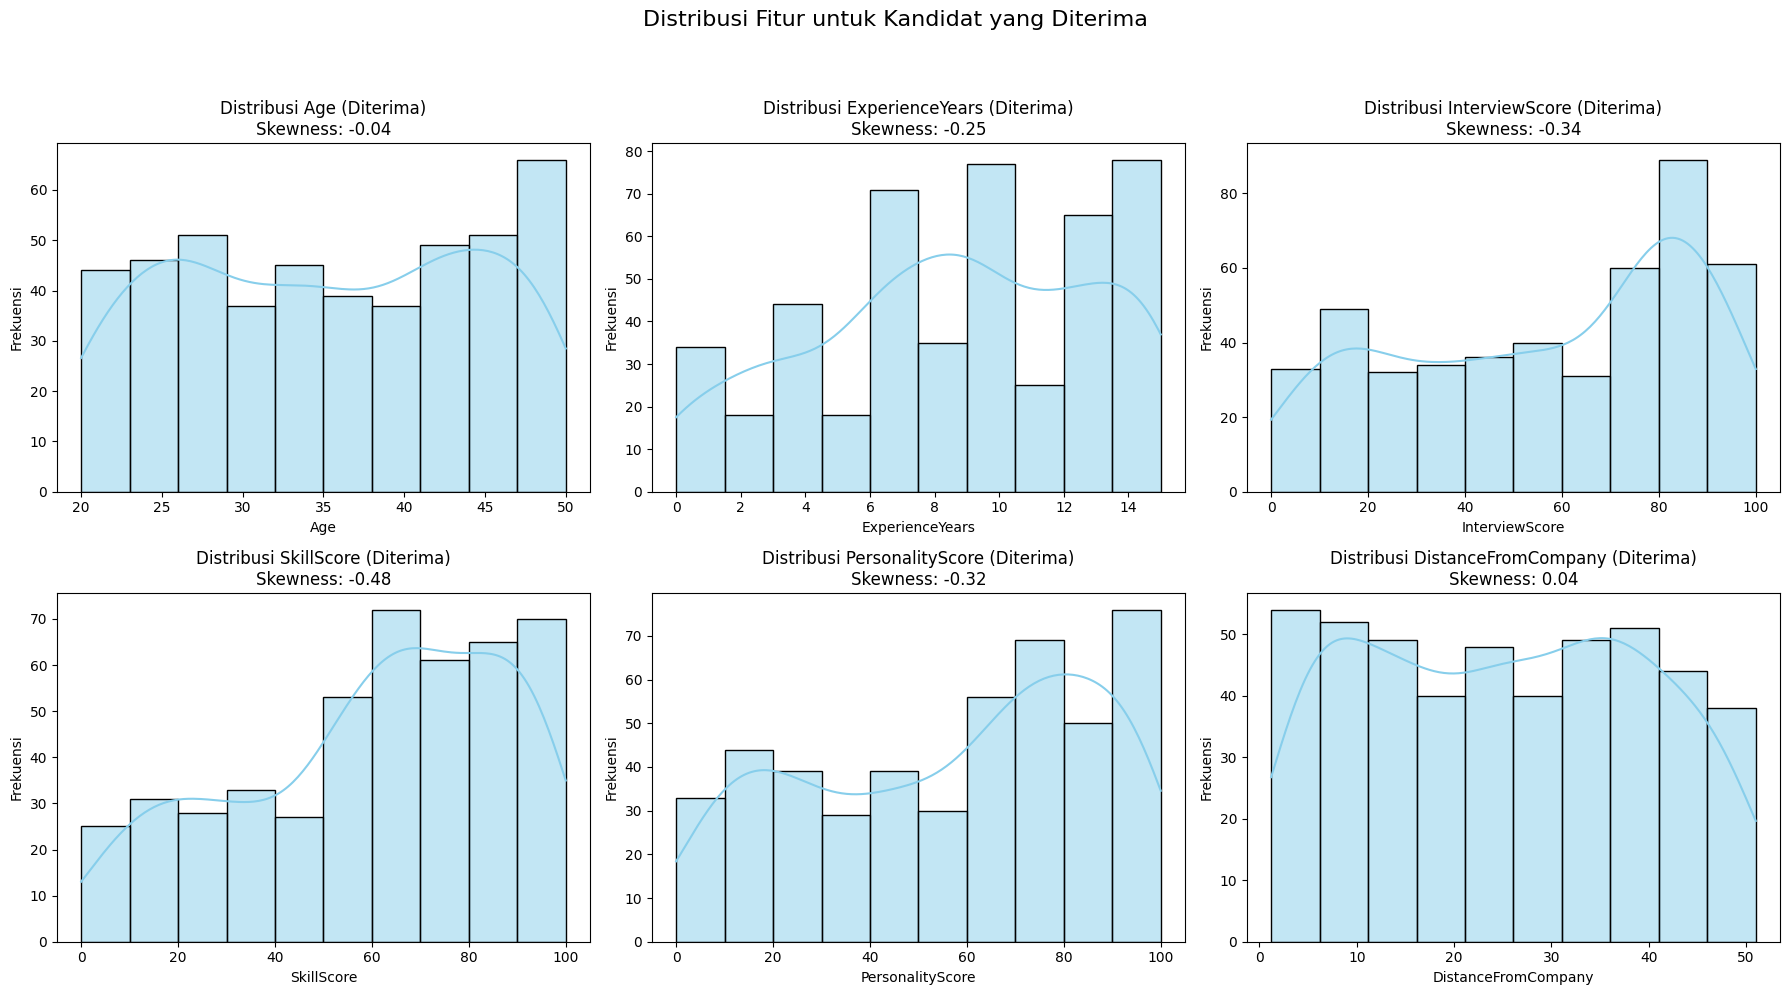

In [8]:
#Hiring decision = 1

import matplotlib.pyplot as plt
# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 1]

# Select only the numerical columns from the filtered dataframe
numerical_cols_hired = df_hired.select_dtypes(include=['number']).columns.tolist()

# Remove 'hiring_decision' from the list of columns to plot as it is the filter
if 'HiringDecision' in numerical_cols_hired:
    numerical_cols_hired.remove('HiringDecision')

## --- Langkah 3: Definisikan Kolom yang Diinginkan ---
# Daftar kolom spesifik yang Anda minta untuk di-plot
selected_columns_for_skewness_plot = [
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany','gender','education'
]

# Filter daftar kolom yang dipilih agar hanya menyertakan yang benar-benar ada di df_hired
# dan yang merupakan tipe numerik.
actual_numerical_cols_to_plot = [
    col for col in selected_columns_for_skewness_plot
    if col in df_hired.columns and pd.api.types.is_numeric_dtype(df_hired[col])
]

if not actual_numerical_cols_to_plot:
    print("Tidak ada kolom numerik yang valid dari daftar yang Anda berikan untuk di-plot dalam data yang diterima.")
else:
    # Langkah 4: Tentukan ukuran grid untuk subplot
    num_plots_hired = len(actual_numerical_cols_to_plot)
    cols_per_row_hired = 3  # Anda bisa menyesuaikan jumlah plot per baris
    rows_per_plot_hired = math.ceil(num_plots_hired / cols_per_row_hired)

    # Langkah 5: Buat subplots untuk distribusi
    fig_dist, axes_dist = plt.subplots(rows_per_plot_hired, cols_per_row_hired,
                                        figsize=(cols_per_row_hired * 6, rows_per_plot_hired * 5))
    axes_dist = axes_dist.flatten()  # Meratakan array axes untuk iterasi yang lebih mudah

    # Langkah 6: Buat plot distribusi untuk setiap kolom yang dipilih
    for i, col in enumerate(actual_numerical_cols_to_plot):
        sns.histplot(data=df_hired, x=col, kde=True, ax=axes_dist[i], color='skyblue') # Warna default untuk plot
        # Hitung skewness
        skewness_val = df_hired[col].skew()
        axes_dist[i].set_title(f'Distribusi {col} (Diterima)\nSkewness: {skewness_val:.2f}', fontsize=12)
        axes_dist[i].set_xlabel(col, fontsize=10)
        axes_dist[i].set_ylabel('Frekuensi', fontsize=10)

    # Langkah 7: Sembunyikan subplot yang tidak digunakan
    for j in range(i + 1, len(axes_dist)):
        fig_dist.delaxes(axes_dist[j])

    # Langkah 8: Sesuaikan tata letak dan tampilkan/simpan plot
    plt.suptitle('Distribusi Fitur untuk Kandidat yang Diterima', y=1.02, fontsize=16) # Judul utama
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Menyesuaikan tata letak agar tidak tumpang tindih

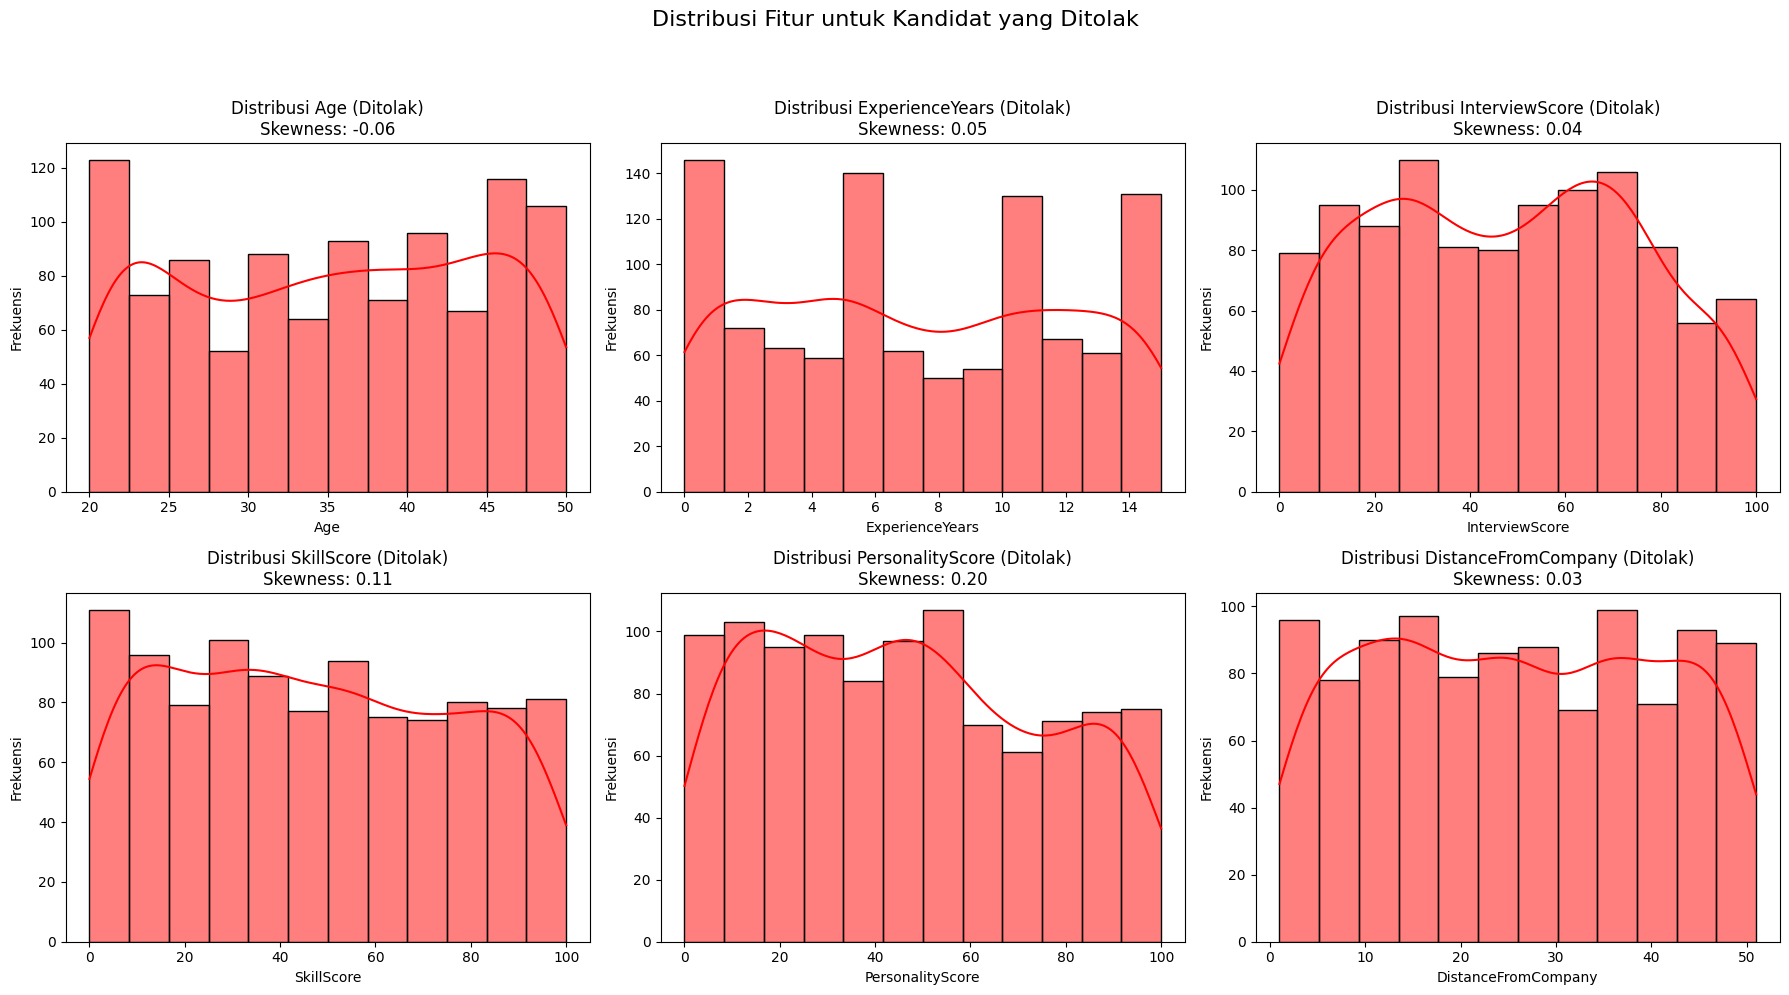

In [9]:
#Hiring decision = 0

import matplotlib.pyplot as plt
# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 0]

# Select only the numerical columns from the filtered dataframe
numerical_cols_hired = df_hired.select_dtypes(include=['number']).columns.tolist()

# Remove 'hiring_decision' from the list of columns to plot as it is the filter
if 'HiringDecision' in numerical_cols_hired:
    numerical_cols_hired.remove('HiringDecision')

## --- Langkah 3: Definisikan Kolom yang Diinginkan ---
# Daftar kolom spesifik yang Anda minta untuk di-plot
selected_columns_for_skewness_plot = [
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany','gender','education'
]

# Filter daftar kolom yang dipilih agar hanya menyertakan yang benar-benar ada di df_hired
# dan yang merupakan tipe numerik.
actual_numerical_cols_to_plot = [
    col for col in selected_columns_for_skewness_plot
    if col in df_hired.columns and pd.api.types.is_numeric_dtype(df_hired[col])
]

if not actual_numerical_cols_to_plot:
    print("Tidak ada kolom numerik yang valid dari daftar yang Anda berikan untuk di-plot dalam data yang diterima.")
else:
    # Langkah 4: Tentukan ukuran grid untuk subplot
    num_plots_hired = len(actual_numerical_cols_to_plot)
    cols_per_row_hired = 3  # Anda bisa menyesuaikan jumlah plot per baris
    rows_per_plot_hired = math.ceil(num_plots_hired / cols_per_row_hired)

    # Langkah 5: Buat subplots untuk distribusi
    fig_dist, axes_dist = plt.subplots(rows_per_plot_hired, cols_per_row_hired,
                                        figsize=(cols_per_row_hired * 6, rows_per_plot_hired * 5))
    axes_dist = axes_dist.flatten()  # Meratakan array axes untuk iterasi yang lebih mudah

    # Langkah 6: Buat plot distribusi untuk setiap kolom yang dipilih
    for i, col in enumerate(actual_numerical_cols_to_plot):
        sns.histplot(data=df_hired, x=col, kde=True, ax=axes_dist[i], color='red') # Warna default untuk plot
        # Hitung skewness
        skewness_val = df_hired[col].skew()
        axes_dist[i].set_title(f'Distribusi {col} (Ditolak)\nSkewness: {skewness_val:.2f}', fontsize=12)
        axes_dist[i].set_xlabel(col, fontsize=10)
        axes_dist[i].set_ylabel('Frekuensi', fontsize=10)

    # Langkah 7: Sembunyikan subplot yang tidak digunakan
    for j in range(i + 1, len(axes_dist)):
        fig_dist.delaxes(axes_dist[j])

    # Langkah 8: Sesuaikan tata letak dan tampilkan/simpan plot
    plt.suptitle('Distribusi Fitur untuk Kandidat yang Ditolak', y=1.02, fontsize=16) # Judul utama
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Menyesuaikan tata letak agar tidak tumpang tindih

In [10]:
# prompt: Check standard deviation for columns that resulted hiring decision = 1

# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 1]

# Select only the numerical columns (excluding HiringDecision itself)
numerical_cols = df_hired.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols:
    numerical_cols.remove('HiringDecision')

# Calculate the standard deviation for each numerical column in the filtered data
std_devs = df_hired[numerical_cols].std()

# Print the standard deviations
print("Standard Deviation for Columns where HiringDecision = 1:")
std_devs

Standard Deviation for Columns where HiringDecision = 1:


,0
Age,9.230395
Gender,0.500445
EducationLevel,0.940267
ExperienceYears,4.344892
PreviousCompanies,1.386384
DistanceFromCompany,14.390860
InterviewScore,30.065245
SkillScore,27.505662
PersonalityScore,29.721124
RecruitmentStrategy,0.646272


In [11]:
# prompt: check variance for each collums for hiring decision = 1

# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 1]

# Select only the numerical columns (excluding HiringDecision itself)
numerical_cols = df_hired.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols:
    numerical_cols.remove('HiringDecision')

# Calculate the variance for each numerical column in the filtered data
variances = df_hired[numerical_cols].var()

# Print the variances
print("\nVariance for Columns where HiringDecision = 1:")
variances


Variance for Columns where HiringDecision = 1:


,0
Age,85.200195
Gender,0.250445
EducationLevel,0.884103
ExperienceYears,18.878087
PreviousCompanies,1.922062
DistanceFromCompany,207.096864
InterviewScore,903.918966
SkillScore,756.561457
PersonalityScore,883.345217
RecruitmentStrategy,0.417668


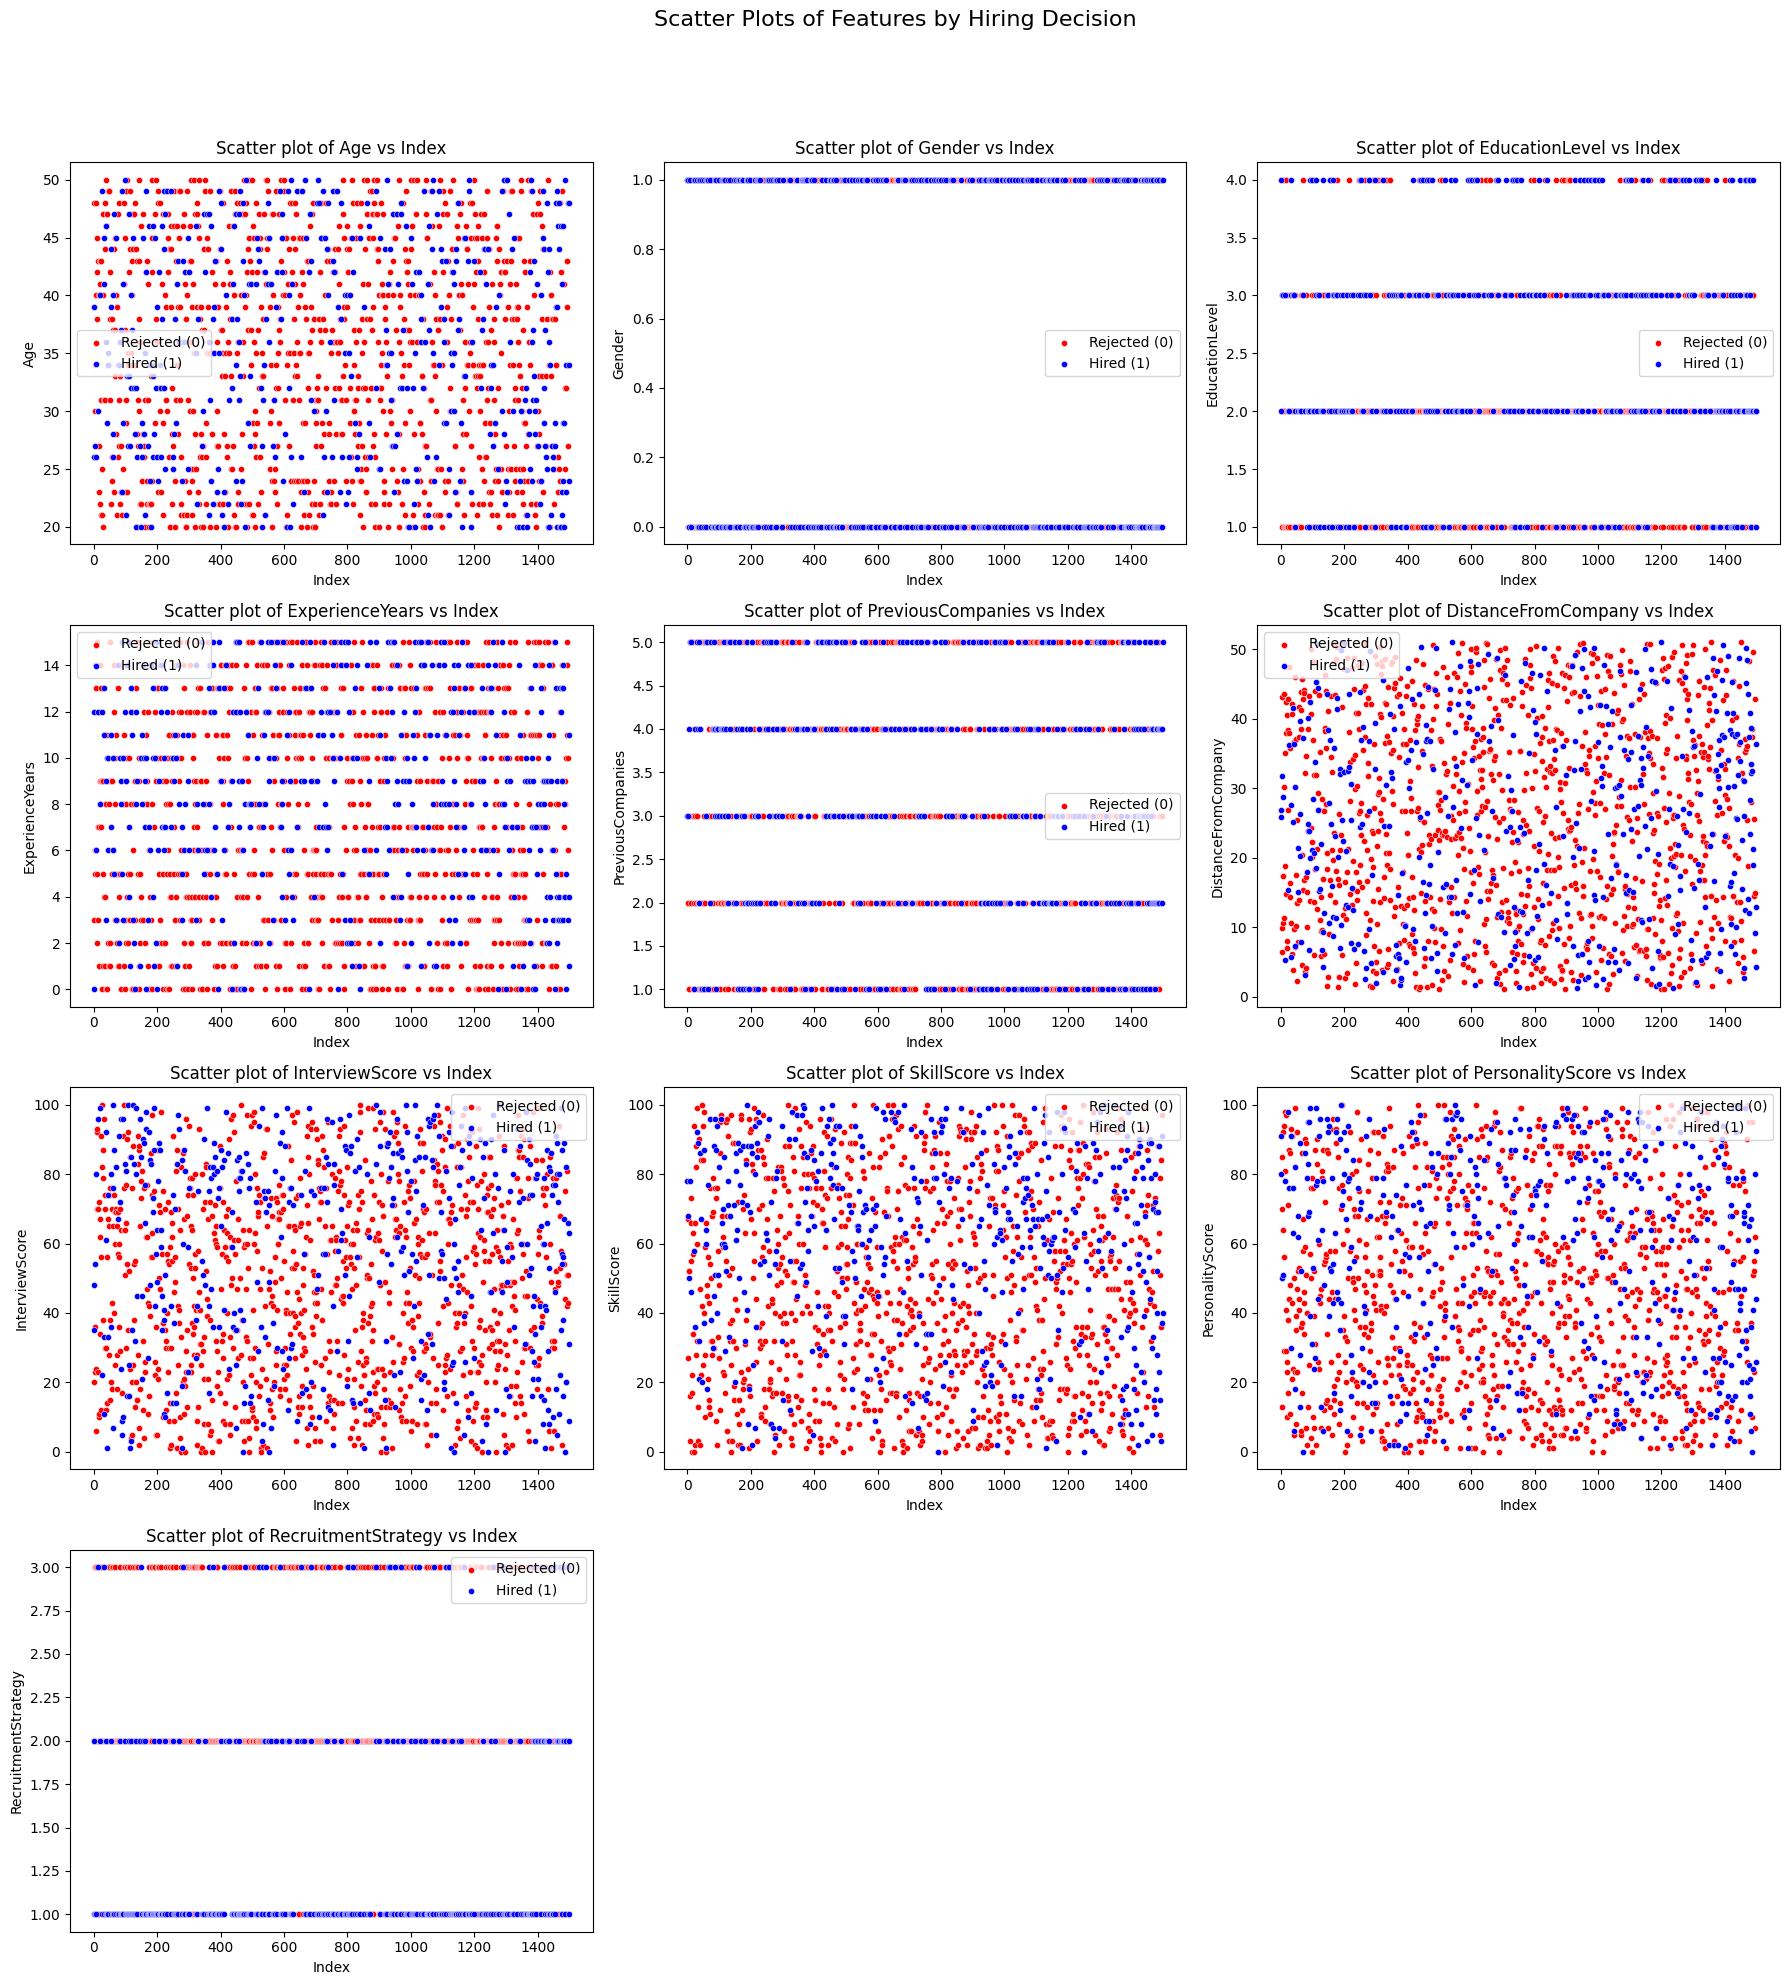

In [12]:
#Scatter plot persebaran hiring

import matplotlib.pyplot as plt
# Identify numerical columns excluding the target variable 'HiringDecision'
numerical_cols_for_scatter = df.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols_for_scatter:
    numerical_cols_for_scatter.remove('HiringDecision')

# Determine the number of columns to plot
num_scatter_plots = len(numerical_cols_for_scatter)

# Calculate grid size for subplots
cols_per_row_scatter = 3 # You can adjust this number
rows_per_plot_scatter = math.ceil(num_scatter_plots / cols_per_row_scatter)

# Create subplots for scatter plots
fig_scatter, axes_scatter = plt.subplots(rows_per_plot_scatter, cols_per_row_scatter,
                                          figsize=(cols_per_row_scatter * 6, rows_per_plot_scatter * 5))
axes_scatter = axes_scatter.flatten() # Flatten the array of axes

# Create scatter plots for each numerical column against its index (or just plotted)
for i, col in enumerate(numerical_cols_for_scatter):
    # Scatter plot for HiringDecision = 0 (Red)
    sns.scatterplot(data=df[df['HiringDecision'] == 0], x=df[df['HiringDecision'] == 0].index, y=col, ax=axes_scatter[i], color='red', label='Rejected (0)', s=20)

    # Scatter plot for HiringDecision = 1 (Blue)
    sns.scatterplot(data=df[df['HiringDecision'] == 1], x=df[df['HiringDecision'] == 1].index, y=col, ax=axes_scatter[i], color='blue', label='Hired (1)', s=20)

    axes_scatter[i].set_title(f'Scatter plot of {col} vs Index', fontsize=12)
    axes_scatter[i].set_xlabel('Index', fontsize=10)
    axes_scatter[i].set_ylabel(col, fontsize=10)
    axes_scatter[i].legend() # Add legend to show color mapping

# Hide any unused subplots
for j in range(i + 1, len(axes_scatter)):
    fig_scatter.delaxes(axes_scatter[j])

# Adjust layout and display plot
plt.suptitle('Scatter Plots of Features by Hiring Decision', y=1.02, fontsize=16) # Main title
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

TESTING

In [13]:
# prompt: Remove data from each column that resulted in hiring decision = 0. make sure the end result will be 50% hiring decision = 1 and 50% hiring decision =0

import pandas as pd
# Separate the dataframe into hired (1) and rejected (0)
df_hired = df[df['HiringDecision'] == 1].copy()
df_rejected = df[df['HiringDecision'] == 0].copy()

# Determine the number of samples needed for each class to achieve a 50/50 split
num_hired = len(df_hired)
num_rejected_to_keep = num_hired # We want 50% of each

# Check if we have enough rejected samples to keep for a 50/50 split with the hired count
if len(df_rejected) > num_rejected_to_keep:
    # Randomly sample the required number of rejected rows
    df_rejected_balanced = df_rejected.sample(n=num_rejected_to_keep, random_state=42) # Using random_state for reproducibility
else:
    # If not enough rejected samples, keep all of them (this means the target split won't be 50/50,
    # but we'll have as many rejected as possible up to the number of hired)
    print(f"Warning: Not enough rejected samples ({len(df_rejected)}) to match hired samples ({num_hired}) for a perfect 50/50 split.")
    print(f"Keeping all {len(df_rejected)} rejected samples.")
    df_rejected_balanced = df_rejected.copy()

# Concatenate the hired and balanced rejected dataframes
df_balanced = pd.concat([df_hired, df_rejected_balanced], ignore_index=True)

# Shuffle the final dataframe to mix the hired and rejected rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new distribution of HiringDecision
print("\nDistribution of HiringDecision in the balanced dataset:")
print(df_balanced['HiringDecision'].value_counts())

# Display the head of the balanced dataframe
print("\nHead of the balanced dataframe:")
print(df_balanced.head())

# Now, you can continue your analysis using df_balanced
# For example, you could visualize the distributions again on this balanced data
# (The plotting code from the original cells could be adapted to use df_balanced)


Distribution of HiringDecision in the balanced dataset:
HiringDecision
0    465
1    465
Name: count, dtype: int64

Head of the balanced dataframe:
   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   30       0               2                1                  4   
1   48       1               2                9                  2   
2   50       0               4               12                  4   
3   20       0               3               14                  1   
4   20       1               4                9                  2   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            35.745919               2          89                57   
1            49.804301              52          42                82   
2            21.115352              83          51                31   
3             5.719874              72          82                53   
4            37.841323              76          27                27  

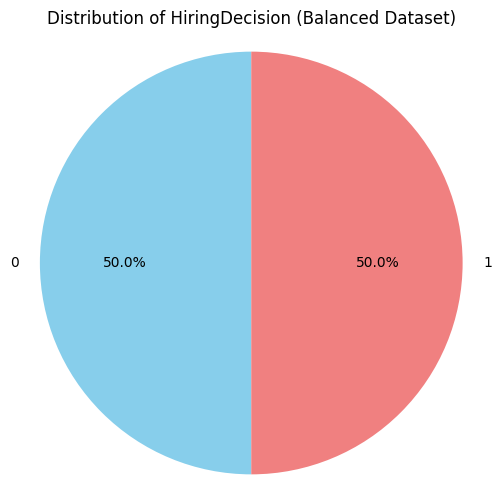

In [14]:
# prompt: create a pie chart using df_balanced

import matplotlib.pyplot as plt
# Count the occurrences of each HiringDecision
hiring_counts = df_balanced['HiringDecision'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(hiring_counts, labels=hiring_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of HiringDecision (Balanced Dataset)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

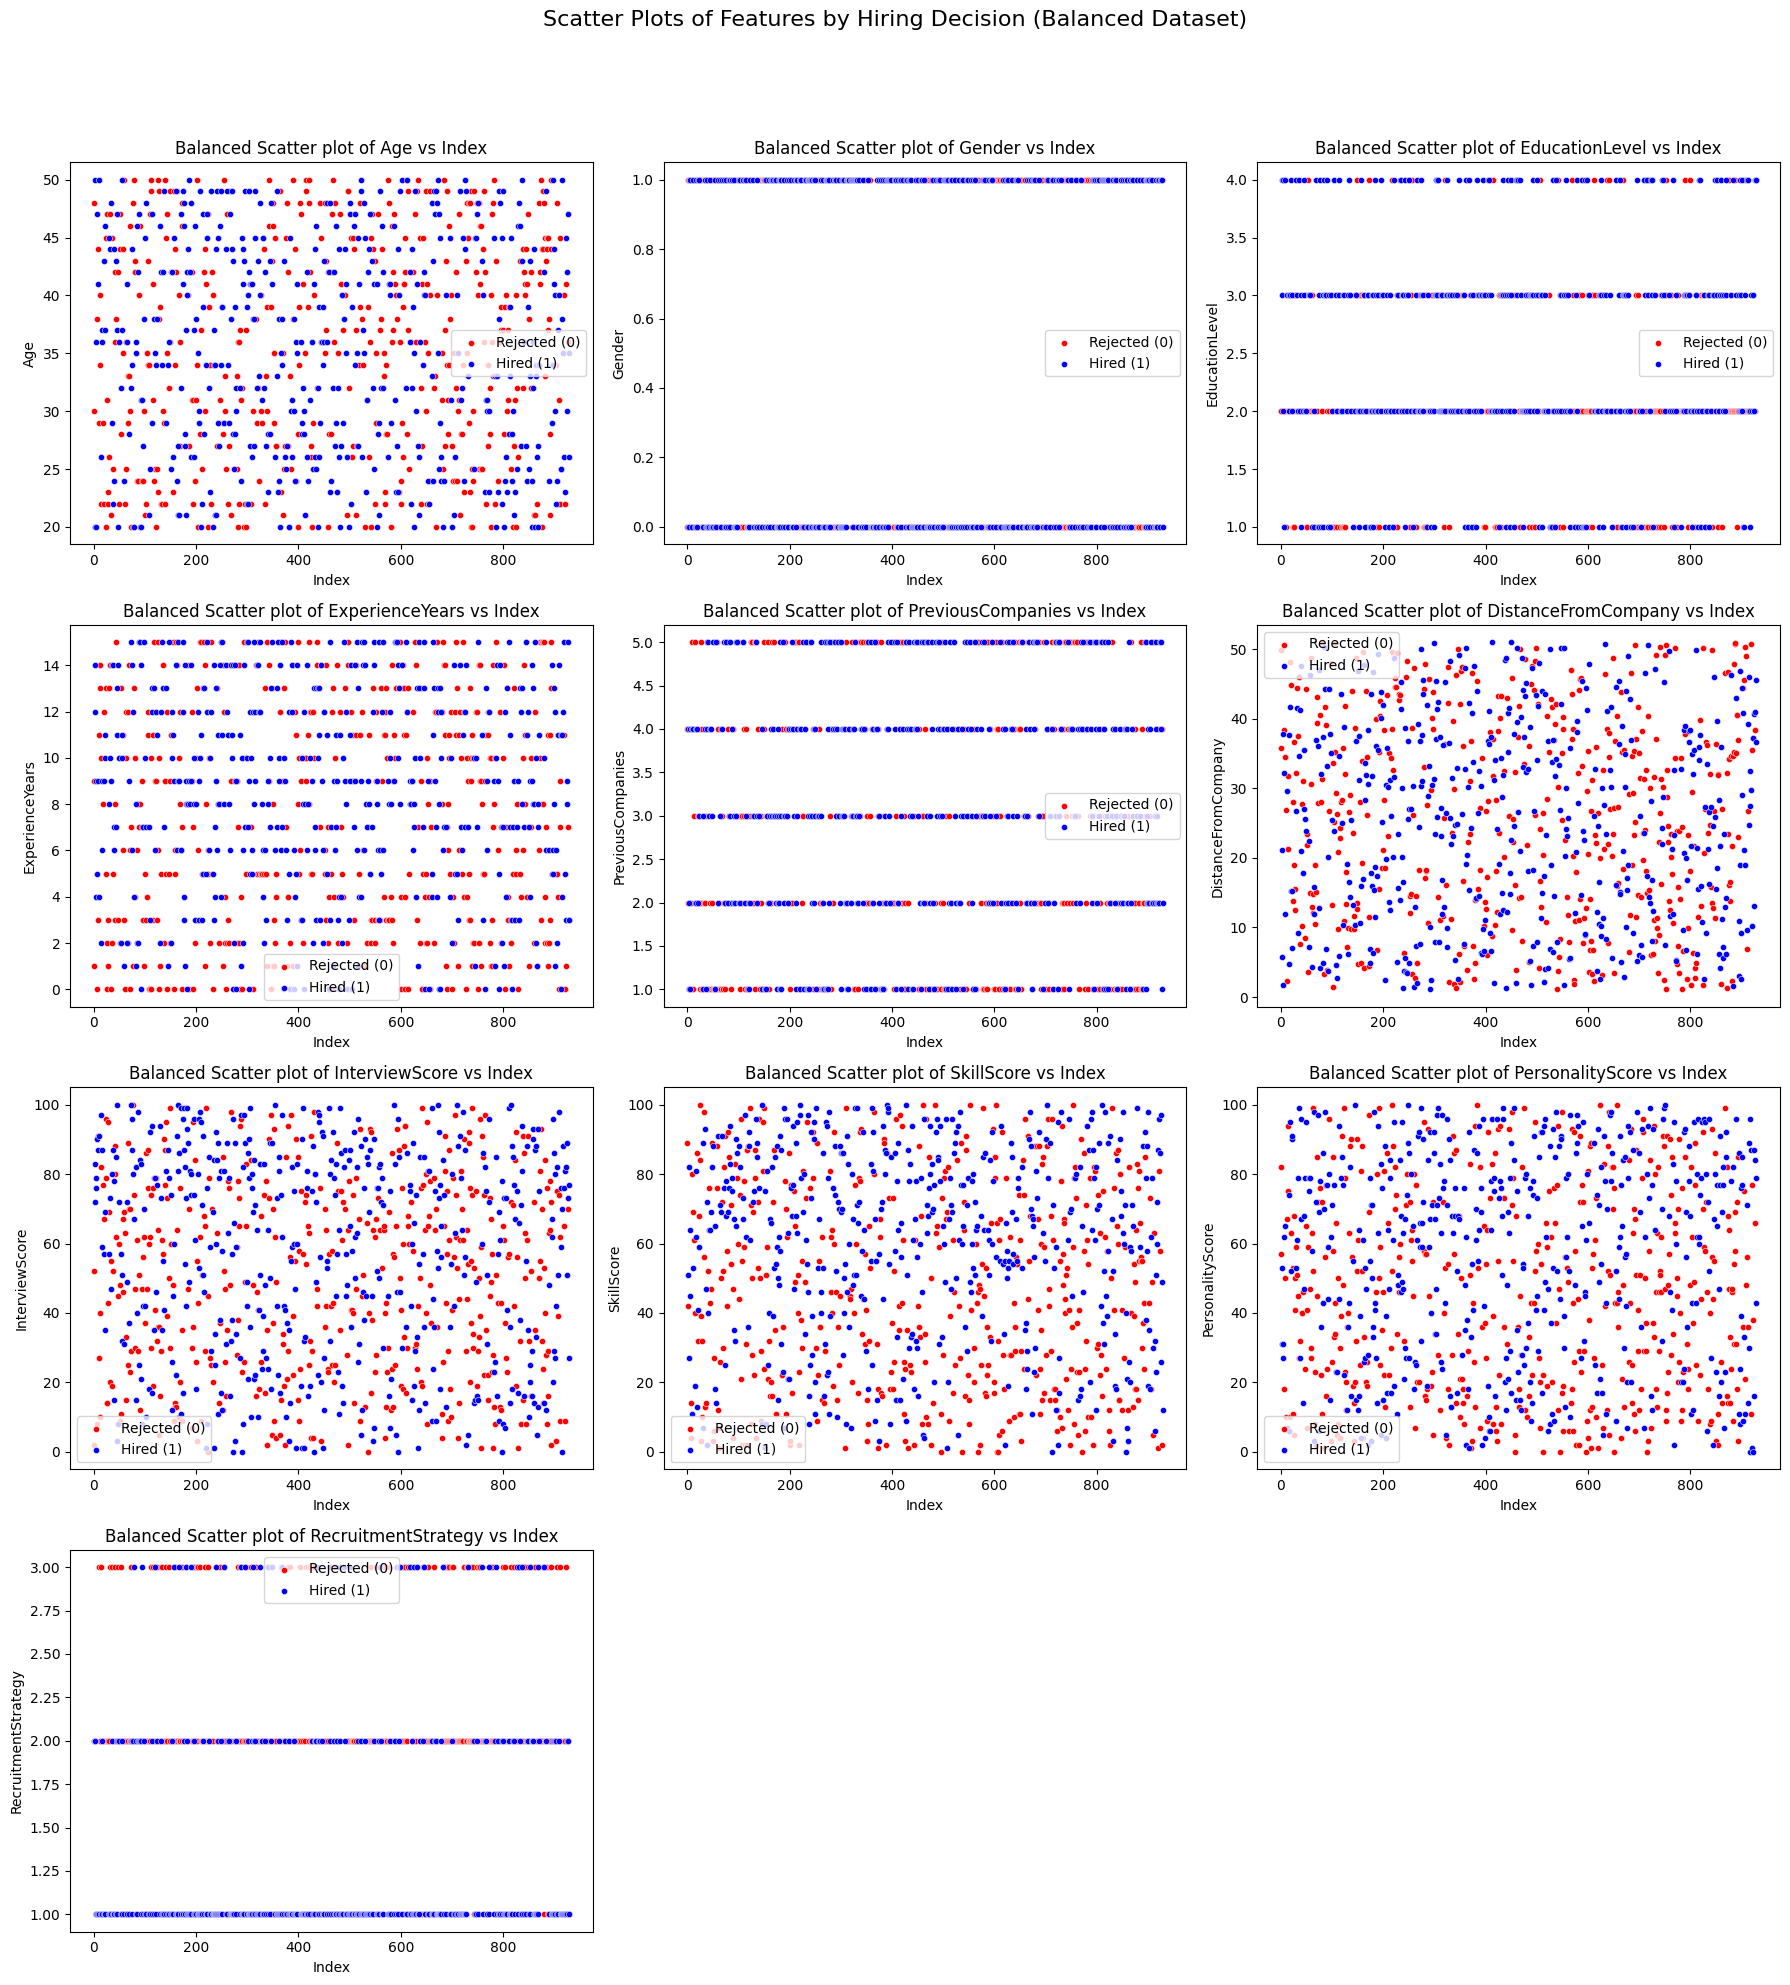

In [15]:
# prompt: create a scatterplot using df_balanced. hiring decision = 1 is blue and hiring decision = 0 is red

import matplotlib.pyplot as plt
# Identify numerical columns in the balanced dataframe, excluding 'HiringDecision'
numerical_cols_balanced_scatter = df_balanced.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols_balanced_scatter:
    numerical_cols_balanced_scatter.remove('HiringDecision')

# Determine the number of columns to plot
num_scatter_plots_balanced = len(numerical_cols_balanced_scatter)

# Calculate grid size for subplots
cols_per_row_scatter_balanced = 3 # You can adjust this number
rows_per_plot_scatter_balanced = math.ceil(num_scatter_plots_balanced / cols_per_row_scatter_balanced)

# Create subplots for scatter plots using the balanced data
fig_scatter_balanced, axes_scatter_balanced = plt.subplots(rows_per_plot_scatter_balanced, cols_per_row_scatter_balanced,
                                                          figsize=(cols_per_row_scatter_balanced * 6, rows_per_plot_scatter_balanced * 5))
axes_scatter_balanced = axes_scatter_balanced.flatten() # Flatten the array of axes

# Create scatter plots for each numerical column against its index (or just plotted)
for i, col in enumerate(numerical_cols_balanced_scatter):
    # Scatter plot for HiringDecision = 0 (Red)
    sns.scatterplot(data=df_balanced[df_balanced['HiringDecision'] == 0], x=df_balanced[df_balanced['HiringDecision'] == 0].index, y=col, ax=axes_scatter_balanced[i], color='red', label='Rejected (0)', s=20)

    # Scatter plot for HiringDecision = 1 (Blue)
    sns.scatterplot(data=df_balanced[df_balanced['HiringDecision'] == 1], x=df_balanced[df_balanced['HiringDecision'] == 1].index, y=col, ax=axes_scatter_balanced[i], color='blue', label='Hired (1)', s=20)

    axes_scatter_balanced[i].set_title(f'Balanced Scatter plot of {col} vs Index', fontsize=12)
    axes_scatter_balanced[i].set_xlabel('Index', fontsize=10)
    axes_scatter_balanced[i].set_ylabel(col, fontsize=10)
    axes_scatter_balanced[i].legend() # Add legend to show color mapping

# Hide any unused subplots
for j in range(i + 1, len(axes_scatter_balanced)):
    fig_scatter_balanced.delaxes(axes_scatter_balanced[j])

# Adjust layout and display plot
plt.suptitle('Scatter Plots of Features by Hiring Decision (Balanced Dataset)', y=1.02, fontsize=16) # Main title
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

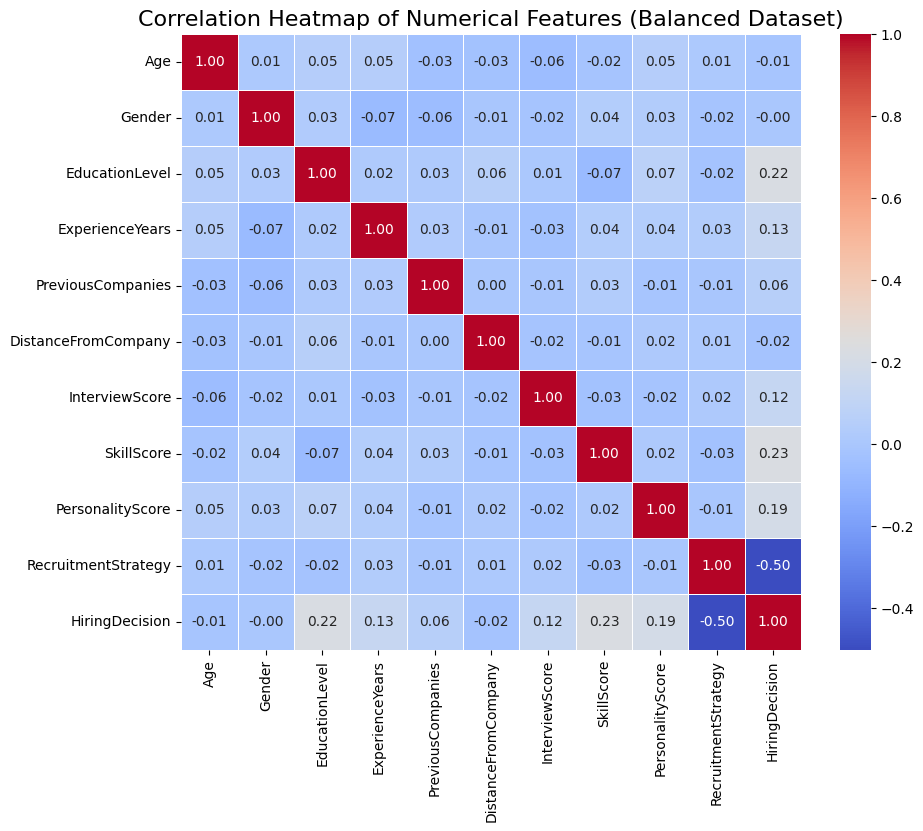

In [16]:
# prompt: create a heatmap correllation with df_balanced

import matplotlib.pyplot as plt
# Select only numerical columns from the balanced dataframe
numerical_cols_balanced = df_balanced.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols_balanced.corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Balanced Dataset)', fontsize=16)
plt.show()

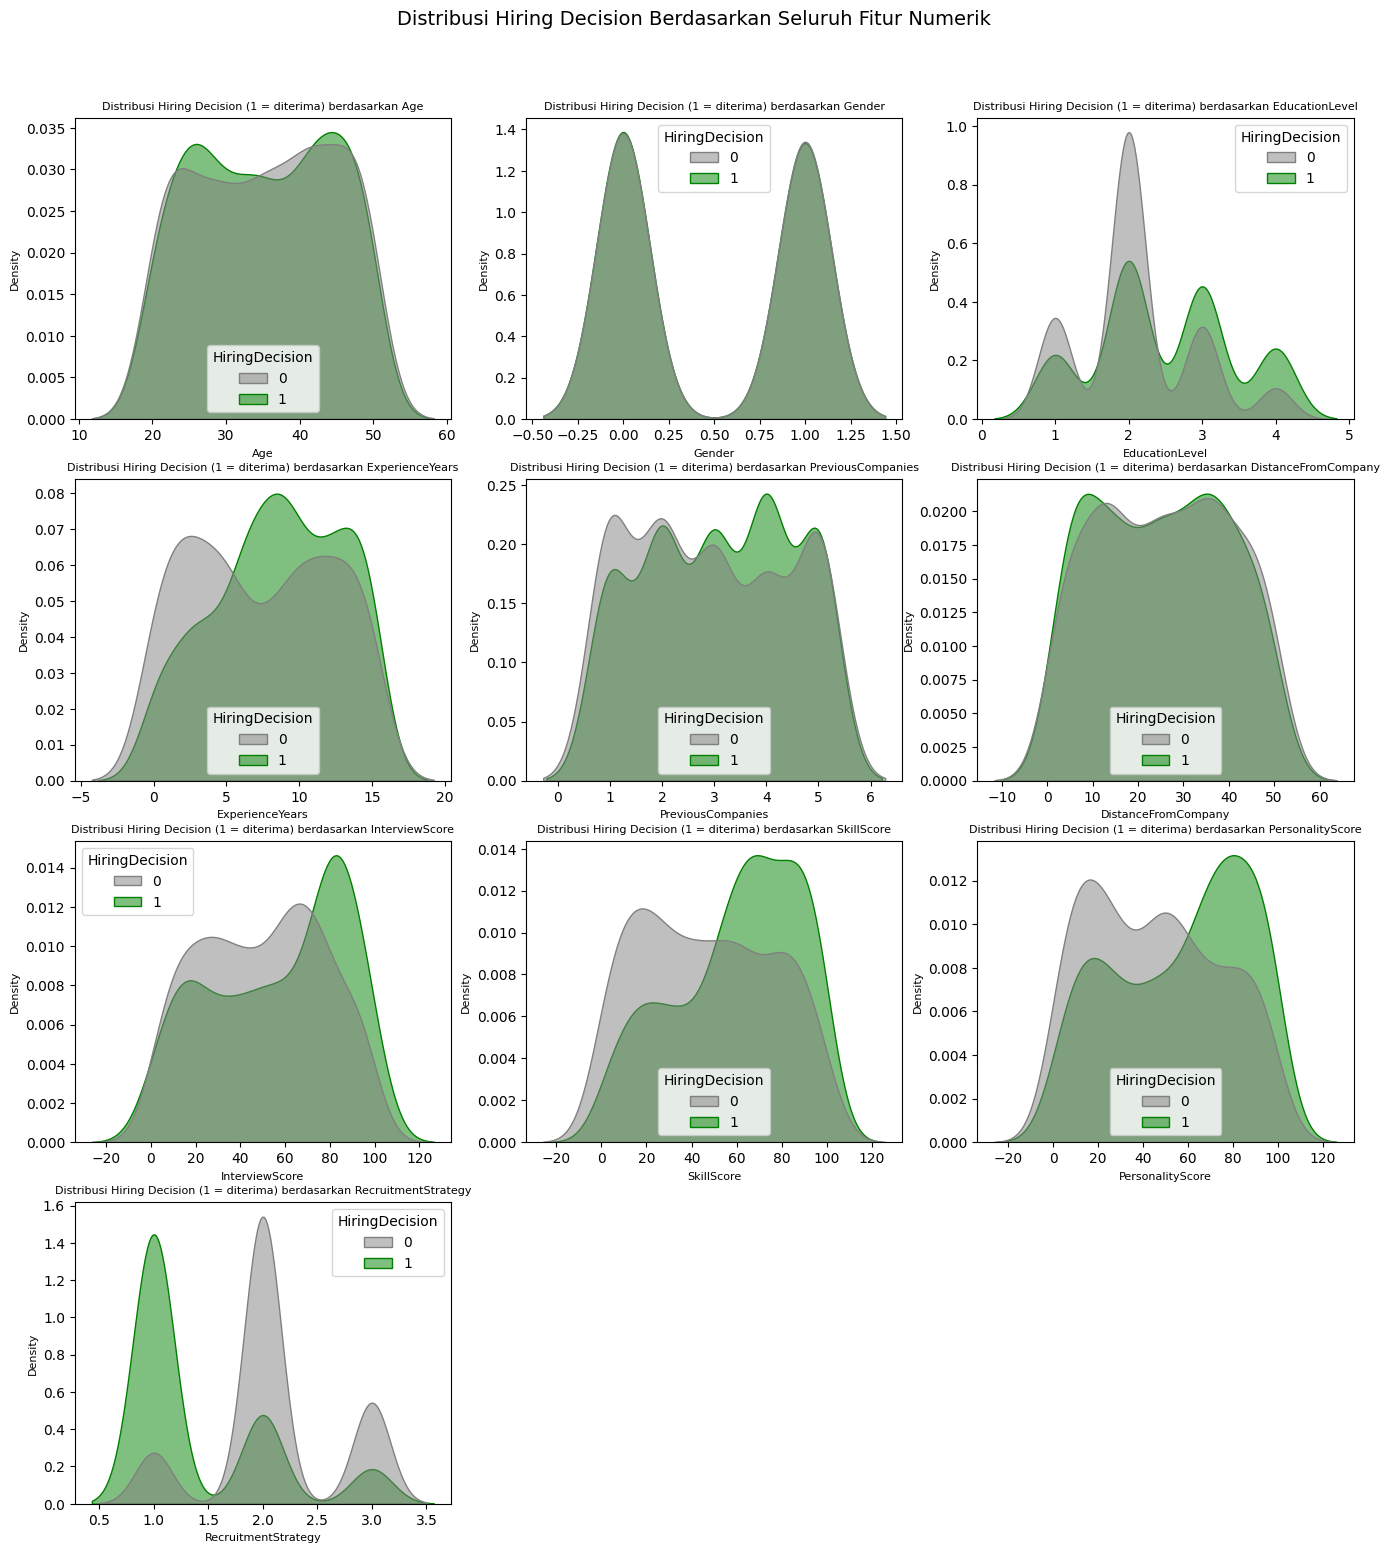

In [17]:
numerical_cols = df_balanced.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols: # Pastikan 'HiringDecision' tidak di-plot sebagai fitur numerik
    numerical_cols.remove('HiringDecision')

if not numerical_cols:
    print("Tidak ada kolom numerik yang ditemukan untuk di-plot distribusinya.")
else:
    # Langkah 3: Menentukan ukuran grid untuk subplot secara dinamis
    num_plots = len(numerical_cols)
    num_cols = 3  # Anda bisa mengubah ini untuk mengatur berapa banyak plot per baris
    num_rows = math.ceil(num_plots / num_cols)

    # Membuat figure dan axes untuk semua subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5.5, num_rows * 4.5))
    axes = axes.flatten() # Meratakan array axes agar lebih mudah diiterasi dalam loop

    # Variabel untuk menyimpan handle dan label legend dari plot pertama
    # Ini akan digunakan untuk membuat satu legend global
    handles, labels = None, None

    custom_palette = {1: 'green', 0: 'grey'}

    # Langkah 4: Loop melalui setiap kolom numerik dan buat plot KDE
    for i, col in enumerate(numerical_cols):
        if i < len(axes): # Memastikan kita tidak melebihi jumlah subplot yang tersedia
            sns.kdeplot(data=df_balanced, x=col, hue='HiringDecision', fill=True,
                        common_norm=False, alpha=0.5, ax=axes[i],palette=custom_palette)
            axes[i].set_title(f'Distribusi Hiring Decision (1 = diterima) berdasarkan {col}', fontsize=8)
            axes[i].set_xlabel(col, fontsize=8)
            axes[i].set_ylabel('Density', fontsize=8)
         # --- BAGIAN PENTING: Mengambil handles dan Menentukan Label Legend Kustom ---
            # Mengambil handles dan label default dari plot yang baru dibuat
            handles, default_labels = axes[i].get_legend_handles_labels()


    # Langkah 5: Hapus subplot yang kosong jika ada (jika jumlah plot tidak pas dengan grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Langkah 6: Tambahkan Legend Tunggal untuk Seluruh Gambar (Figure)
    if handles and labels:
        fig.legend(handles=handles, labels=labels, title='HiringDecision',
                   loc='upper right', bbox_to_anchor=(1.08, 1), # Menempatkan legend di luar area plot utama
                   fontsize=9, title_fontsize=10)

    # Langkah 7: Beri Judul Keseluruhan dan Simpan Plot
    plt.suptitle('Distribusi Hiring Decision Berdasarkan Seluruh Fitur Numerik', y=0.94, fontsize=14)

In [18]:
# Buat tabel distribusi deskriptif terpisah berdasarkan HiringDecision
distribution_table =df_balanced.groupby('HiringDecision')[[
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany',
]].describe().transpose()
print("Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)")
distribution_table


Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)


HiringDecision                      0           1
Age                 count  465.000000  465.000000
                    mean    35.352688   35.174194
                    std      9.371426    9.230395
                    min     20.000000   20.000000
                    25%     27.000000   27.000000
                    50%     36.000000   35.000000
                    75%     44.000000   44.000000
                    max     50.000000   50.000000
ExperienceYears     count  465.000000  465.000000
                    mean     7.341935    8.541935
                    std      4.831790    4.344892
                    min      0.000000    0.000000
                    25%      3.000000    6.000000
                    50%      7.000000    9.000000
                    75%     12.000000   12.000000
                    max     15.000000   15.000000
InterviewScore      count  465.000000  465.000000
                    mean    49.645161   56.800000
                    std     27.410373   30.065245
                    min      0.000000    0.000000
                    25%     26.000000   31.000000
                    50%     51.000000   62.000000
                    75%     72.000000   83.000000
                    max    100.000000  100.000000
SkillScore          count  465.000000  465.000000
                    mean    46.731183   60.032258
                    std     29.372437   27.505662
                    min      0.000000    0.000000
                    25%     21.000000   39.000000
                    50%     45.000000   65.000000
                    75%     73.000000   83.000000
                    max    100.000000  100.000000
PersonalityScore    count  465.000000  465.000000
                    mean    45.311828   56.793548
                    std     28.958866   29.721124
                    min      0.000000    0.000000
                    25%     20.000000   30.000000
                    50%     45.000000   63.000000
                    75%     70.000000   82.000000
                    max    100.000000  100.000000
DistanceFromCompany count  465.000000  465.000000
                    mean    25.813450   25.140583
                    std     14.523866   14.390860
                    min      1.103826    1.197997
                    25%     13.176417   12.150491
                    50%     26.369488   25.405877
                    75%     37.946523   37.120569
                    max     50.966814   50.992462

**COBA MODELLING TESITNG 50% HD 1:50% HD 0**

In [25]:
# prompt: Split df_balanced data 0.8 for training and 0.2 for test with the column Skillscore, ExperienceYears, EducationLevel, InterviewScore, PersonalityScore, PreviousCompanies for machine learning. after that, smote the training set and scale it

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
features = ['SkillScore', 'ExperienceYears', 'EducationLevel', 'InterviewScore', 'PersonalityScore', 'PreviousCompanies']
X = df_balanced[features]
y = df_balanced['HiringDecision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify to maintain the class distribution

print("Original training set shape:", X_train.shape, y_train.shape)
print("Original testing set shape:", X_test.shape, y_test.shape)
print("Original training set distribution:\n", y_train.value_counts())
print("Original testing set distribution:\n", y_test.value_counts())

# Apply SMOTE to the training set
# Ensure you only apply SMOTE to the training data to avoid data leakage
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nTraining set shape after SMOTE:", X_train_smote.shape, y_train_smote.shape)
print("Training set distribution after SMOTE:\n", y_train_smote.value_counts())

# Scale the SMOTEd training data and the original test data
scaler = StandardScaler()

# Fit the scaler on the SMOTEd training data and transform it
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames (optional, but can be helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

print("\nScaled training data head:")
print(X_train_scaled.head())
print("\nScaled testing data head:")
print(X_test_scaled.head())

print("\nData splitting, SMOTE, and scaling completed.")


Original training set shape: (744, 6) (744,)
Original testing set shape: (186, 6) (186,)
Original training set distribution:
 HiringDecision
1    372
0    372
Name: count, dtype: int64
Original testing set distribution:
 HiringDecision
0    93
1    93
Name: count, dtype: int64

Training set shape after SMOTE: (744, 6) (744,)
Training set distribution after SMOTE:
 HiringDecision
1    372
0    372
Name: count, dtype: int64

Scaled training data head:
   SkillScore  ExperienceYears  EducationLevel  InterviewScore  \
0    1.319266         0.619692        1.902614       -1.486964   
1    0.090557        -1.749088       -0.340722        0.040118   
2    1.114481        -1.749088        1.902614        0.873071   
3   -1.240545         1.265722       -0.340722        1.116016   
4    0.329472         1.050379       -0.340722       -0.272240   

   PersonalityScore  PreviousCompanies  
0         -0.702047            1.41713  
1         -0.201610            0.00946  
2         -0.568597       

Logistic Regression Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68        93
           1       0.68      0.58      0.63        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.65       186
weighted avg       0.66      0.66      0.65       186


Confusion Matrix:
[[68 25]
 [39 54]]


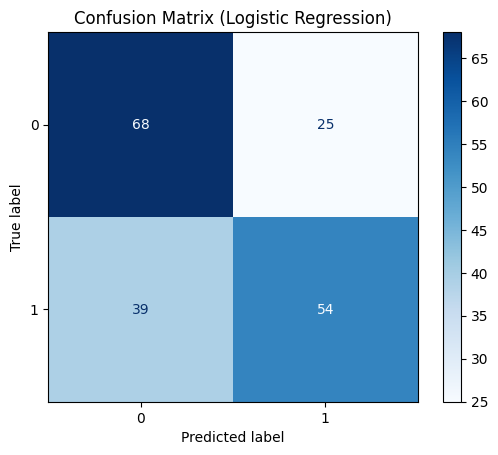


AUC: 0.7244


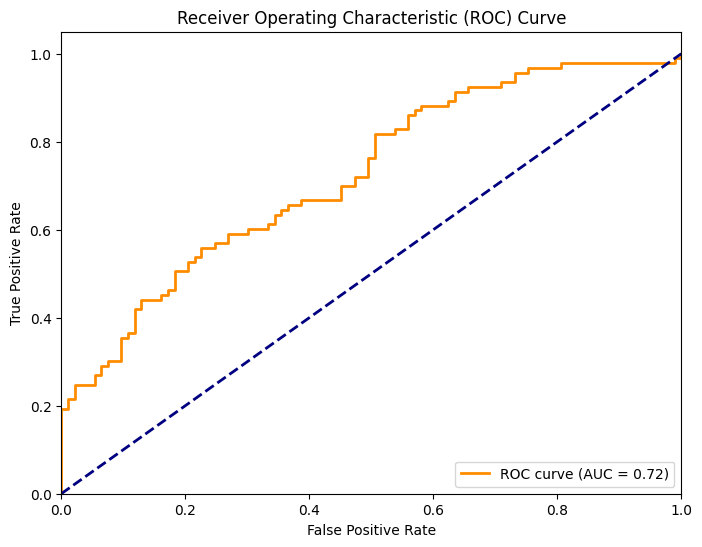


Logistic Regression model training and evaluation completed.


In [26]:
# prompt: Create a machine learning model using logistic regression

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model using the scaled SMOTEd training data
log_reg.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# ROC Curve and AUC
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print(f"\nAUC: {auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\nLogistic Regression model training and evaluation completed.")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters found by GridSearchCV:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Best cross-validation score (ROC AUC):
0.7162074506939371

Evaluation of the best Logistic Regression model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68        93
           1       0.68      0.58      0.63        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.65       186
weighted avg       0.66      0.66      0.65       186


Confusion Matrix (Tuned Logistic Regression):
[[68 25]
 [39 54]]


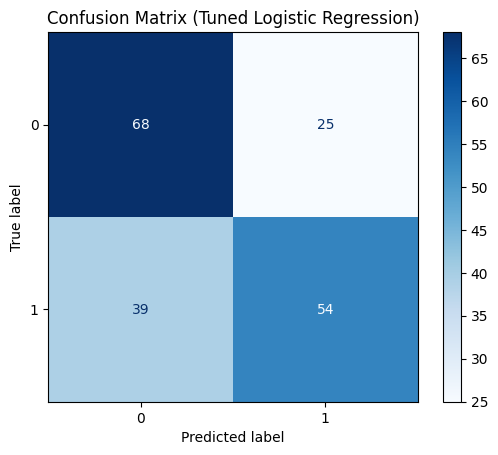


AUC (Tuned Logistic Regression): 0.7247


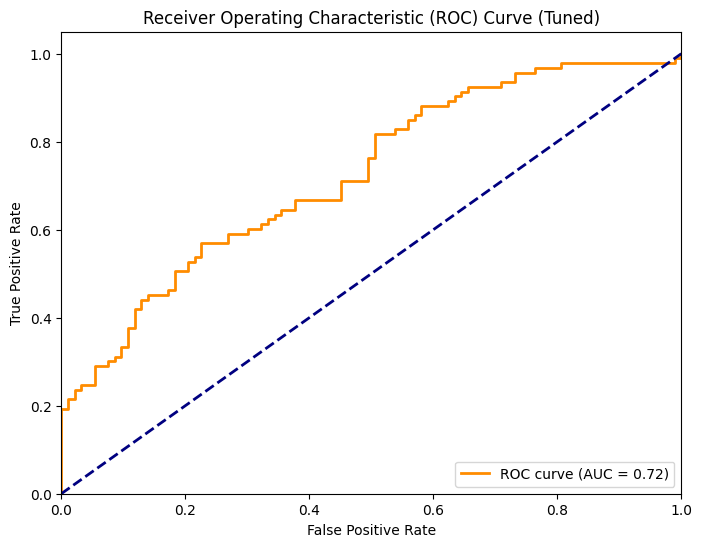


Hyperparameter tuning completed.


In [33]:
# prompt: From the result logistic regression, do hyper parameter tuning for the machine learning model for logistic regression

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline # Use ImbPipeline for SMOTE within the pipeline

# Define the parameter grid for GridSearchCV
# C is the inverse of regularization strength. Smaller values specify stronger regularization.
# penalty specifies the norm used in the penalization (L1 or L2).
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'], # L1 penalty requires solver 'liblinear' or 'saga' and might not work with all solvers. 'l2' is standard.
    'logisticregression__solver': ['liblinear', 'lbfgs'] # Common solvers for small and large datasets respectively
}

# Create a pipeline that includes scaling and the Logistic Regression model
# SMOTE is applied to the training data BEFORE scaling in the previous code.
# If you want to incorporate SMOTE into the GridSearchCV pipeline, you need ImbPipeline
# However, applying SMOTE inside the inner loop of cross-validation (which GridSearchCV does)
# is the correct way to prevent data leakage. Let's create a pipeline including SMOTE.
# Note: For this to work, SMOTE needs to be imported from imblearn.pipeline

# Define the pipeline with SMOTE, Scaling, and Logistic Regression
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE will be applied during the fit on each training fold
    ('scaler', StandardScaler()),       # Scaling will be applied after SMOTE
    ('logisticregression', LogisticRegression(random_state=42)) # The model to tune
])


# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc', # Or 'accuracy', 'f1', etc., depending on your objective
                           verbose=1,
                           n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The SMOTE step in the pipeline will handle resampling within each cross-validation fold
grid_search.fit(X_train, y_train) # Use original X_train, y_train here

# Get the best parameters and the best score
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest cross-validation score (ROC AUC):")
print(grid_search.best_score_)

# Get the best model from the grid search
best_log_reg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_log_reg_model.predict(X_test) # The pipeline handles scaling internally for prediction
y_prob_tuned = best_log_reg_model.predict_proba(X_test)[:, 1]

print("\nEvaluation of the best Logistic Regression model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix (Tuned Logistic Regression):")
print(cm_tuned)

# Plot Confusion Matrix for tuned model
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=best_log_reg_model.classes_)
disp_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.show()

# ROC Curve and AUC for tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_prob_tuned)
auc_tuned = roc_auc_score(y_test, y_prob_tuned)

print(f"\nAUC (Tuned Logistic Regression): {auc_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned)')
plt.legend(loc="lower right")
plt.show()

print("\nHyperparameter tuning completed.")



SVM Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66        93
           1       0.66      0.59      0.62        93

    accuracy                           0.65       186
   macro avg       0.65      0.65      0.64       186
weighted avg       0.65      0.65      0.64       186


Confusion Matrix (SVM):
[[65 28]
 [38 55]]


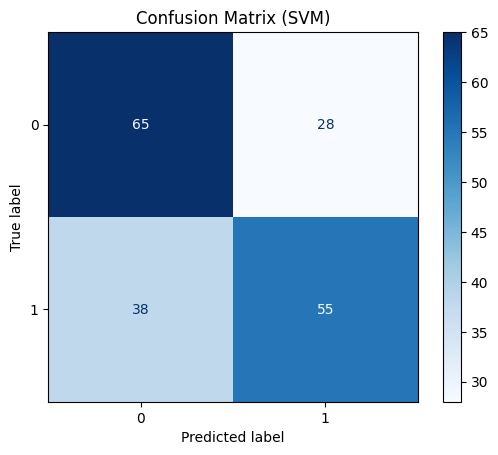


SVM AUC: 0.7229


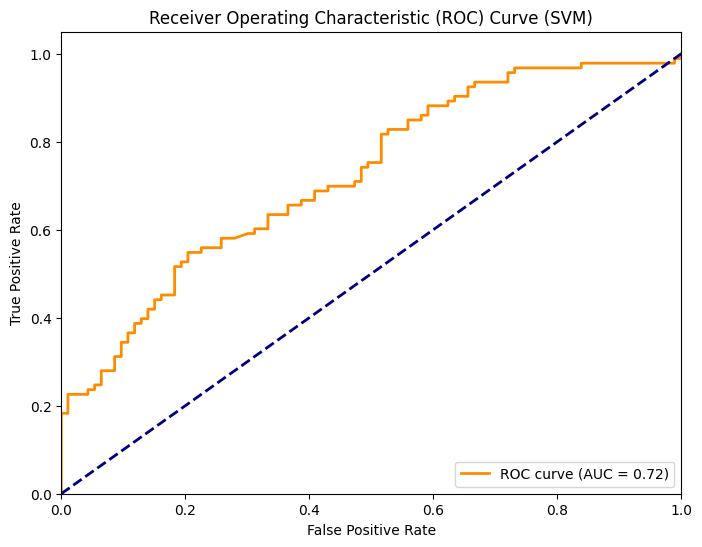


SVM model training and evaluation completed.


In [27]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using SVM

import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Initialize the SVM model
# You can start with a linear kernel or try an RBF kernel (common choices)
# Let's start with a linear kernel
svm_model = SVC(kernel='linear', random_state=42, probability=True) # probability=True allows predict_proba

# Train the model using the scaled SMOTEd training data
svm_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
print("\nSVM Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (SVM):")
print(cm_svm)

# Plot Confusion Matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.show()

# ROC Curve and AUC for SVM
# Get probability scores for the positive class
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print(f"\nSVM AUC: {auc_svm:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

print("\nSVM model training and evaluation completed.")



Starting GridSearchCV for SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found by GridSearchCV for SVM:
{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

Best cross-validation score (ROC AUC) for SVM:
0.7321100560019479

Evaluation of the best SVM model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        93
           1       0.70      0.55      0.61        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.65       186
weighted avg       0.66      0.66      0.65       186


Confusion Matrix (Tuned SVM):
[[71 22]
 [42 51]]


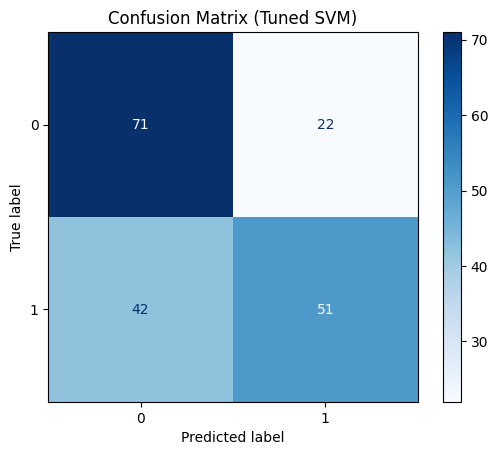


AUC (Tuned SVM): 0.7212


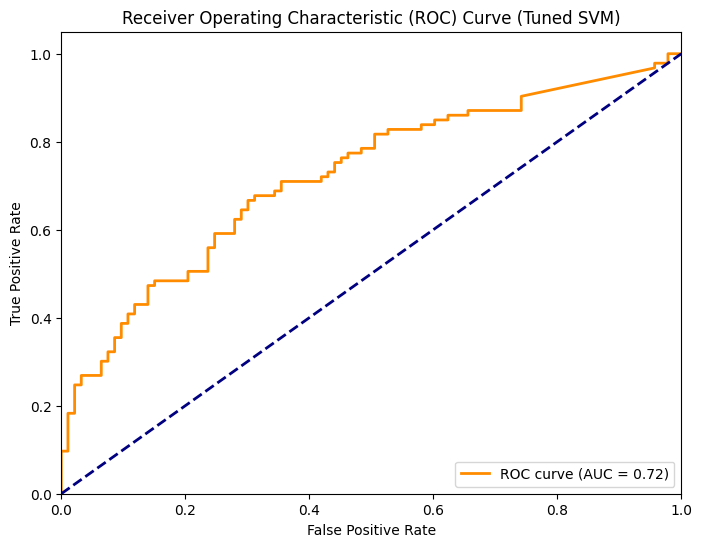


SVM Hyperparameter tuning completed.


In [34]:
# prompt: From the result of SVM, do hyper parameter tuning for the machine learning model for SVM

import matplotlib.pyplot as plt
# --- Hyperparameter Tuning for SVM using GridSearchCV ---

# Define the parameter grid for GridSearchCV for SVM
# C: Regularization parameter. Smaller C means stronger regularization.
# kernel: Specifies the kernel type to be used in the algorithm. 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' (precomputed not applicable here).
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. Affects how far the influence of a single training example reaches. 'scale' (default) uses 1 / (n_features * X.var()), 'auto' uses 1 / n_features.
param_grid_svm = {
    'svc__C': [0.1, 1, 10, 100],          # Explore different regularization strengths
    'svc__kernel': ['linear', 'rbf'],   # Explore different kernels
    'svc__gamma': ['scale', 'auto', 0.1, 1] # Explore different gamma values (relevant for rbf)
}

# Create a pipeline that includes SMOTE, Scaling, and the SVM model
# This ensures that SMOTE is applied only within the cross-validation loop on the training fold
# and scaling is applied after SMOTE but before the SVM model.
pipeline_svm = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE
    ('svc', SVC(random_state=42, probability=True)) # SVM model (probability=True needed for ROC AUC)
])

# Initialize GridSearchCV for SVM
# cv=5 means 5-fold cross-validation
# scoring='roc_auc' is suitable for imbalanced datasets or when prioritizing ranking performance
grid_search_svm = GridSearchCV(estimator=pipeline_svm,
                               param_grid=param_grid_svm,
                               cv=5,
                               scoring='roc_auc',
                               verbose=2, # Increase verbosity to see progress
                               n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The pipeline handles SMOTE and scaling internally for each fold
print("\nStarting GridSearchCV for SVM...")
grid_search_svm.fit(X_train, y_train) # Use original X_train, y_train here

# Get the best parameters and the best score for SVM
print("\nBest parameters found by GridSearchCV for SVM:")
print(grid_search_svm.best_params_)
print("\nBest cross-validation score (ROC AUC) for SVM:")
print(grid_search_svm.best_score_)

# Get the best SVM model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best SVM model on the test set
# The pipeline handles scaling internally for prediction
y_pred_svm_tuned = best_svm_model.predict(X_test)
y_prob_svm_tuned = best_svm_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best SVM model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm_tuned))

# Confusion Matrix for tuned SVM model
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
print("\nConfusion Matrix (Tuned SVM):")
print(cm_svm_tuned)

# Plot Confusion Matrix for tuned SVM model
disp_svm_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_svm_tuned, display_labels=best_svm_model.classes_)
disp_svm_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned SVM)')
plt.show()

# ROC Curve and AUC for tuned SVM model
fpr_svm_tuned, tpr_svm_tuned, thresholds_svm_tuned = roc_curve(y_test, y_prob_svm_tuned)
auc_svm_tuned = roc_auc_score(y_test, y_prob_svm_tuned)

print(f"\nAUC (Tuned SVM): {auc_svm_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_tuned, tpr_svm_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned SVM)')
plt.legend(loc="lower right")
plt.show()

print("\nSVM Hyperparameter tuning completed.")



Random Forest Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        93
           1       0.65      0.59      0.62        93

    accuracy                           0.64       186
   macro avg       0.64      0.64      0.64       186
weighted avg       0.64      0.64      0.64       186


Confusion Matrix (Random Forest):
[[64 29]
 [38 55]]


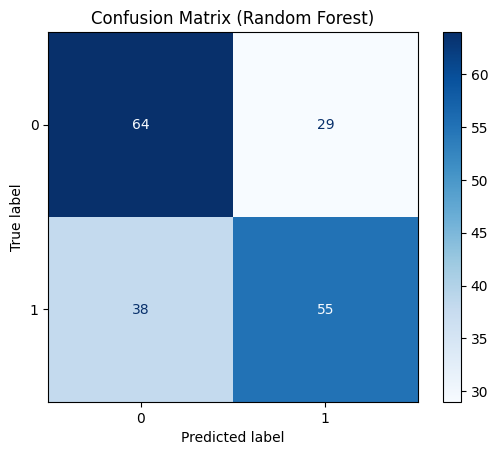


Random Forest AUC: 0.6977


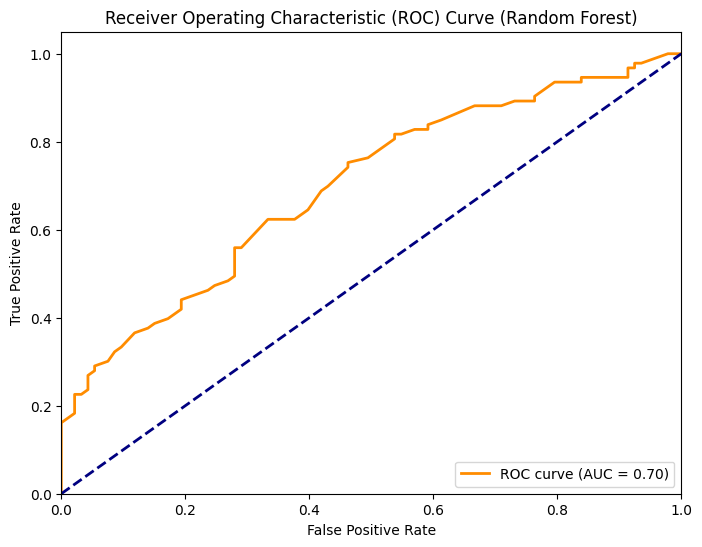


Random Forest model training and evaluation completed.


In [28]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using Random forest

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# You can tune hyperparameters like n_estimators (number of trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled SMOTEd training data
rf_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):")
print(cm_rf)

# Plot Confusion Matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# ROC Curve and AUC for Random Forest
# Get probability scores for the positive class
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"\nRandom Forest AUC: {auc_rf:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

print("\nRandom Forest model training and evaluation completed.")


Starting GridSearchCV for Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters found by GridSearchCV for Random Forest:
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}

Best cross-validation score (ROC AUC) for Random Forest:
0.753081568054541

Evaluation of the best Random Forest model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        93
           1       0.64      0.60      0.62        93

    accuracy                           0.63       186
   macro avg       0.63      0.63      0.63       186
weighted avg       0.63      0.63      0.63       186


Confusion Matrix (Tuned Random Forest):
[[62 31]
 [37 56]]


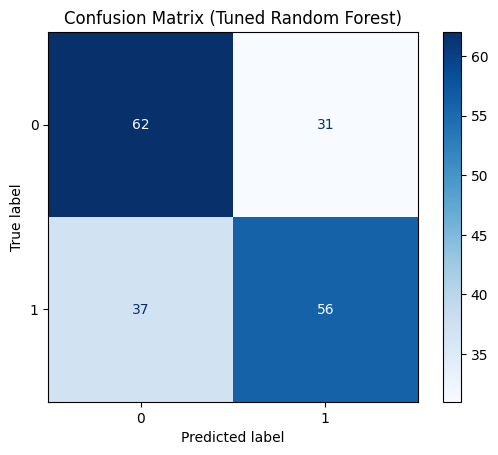


AUC (Tuned Random Forest): 0.7004


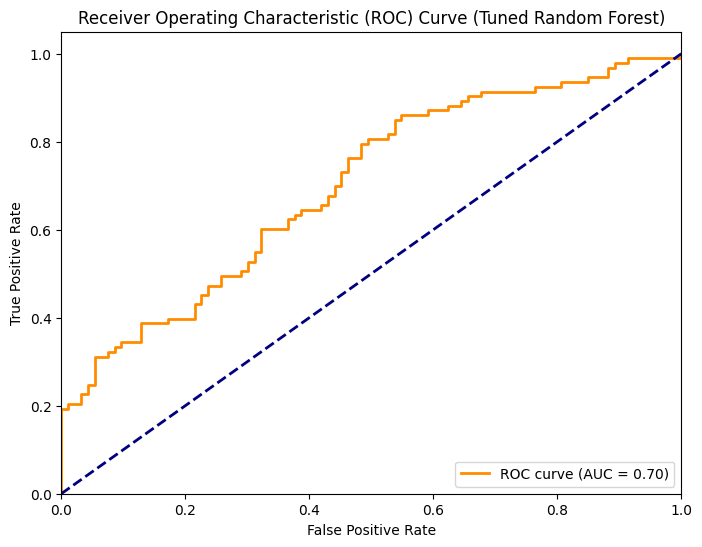


Random Forest Hyperparameter tuning completed.


In [35]:
# prompt: From the result of random forest, do hyper parameter tuning for the machine learning model for random forest

import matplotlib.pyplot as plt
# --- Hyperparameter Tuning for Random Forest using GridSearchCV ---

# Define the parameter grid for GridSearchCV for Random Forest
# n_estimators: The number of trees in the forest.
# max_depth: The maximum depth of the tree. Helps control overfitting.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200], # Explore different numbers of trees
    'randomforestclassifier__max_depth': [None, 10, 20, 30], # Explore different max depths (None means unlimited)
    'randomforestclassifier__min_samples_split': [2, 5, 10], # Explore different minimum samples to split
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],   # Explore different minimum samples per leaf
    'randomforestclassifier__criterion': ['gini', 'entropy'] # Explore different split criteria
}

# Create a pipeline that includes SMOTE, Scaling, and the Random Forest model
# This ensures that SMOTE and scaling are handled correctly within cross-validation
pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE (can be beneficial for some features, though RF is less sensitive)
    ('randomforestclassifier', RandomForestClassifier(random_state=42)) # Random Forest model
])

# Initialize GridSearchCV for Random Forest
# cv=5 means 5-fold cross-validation
# scoring='roc_auc' is suitable for imbalanced datasets or when prioritizing ranking performance
grid_search_rf = GridSearchCV(estimator=pipeline_rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='roc_auc',
                              verbose=2, # Increase verbosity to see progress
                              n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The pipeline handles SMOTE and scaling internally for each fold
print("\nStarting GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train) # Use original X_train, y_train here

# Get the best parameters and the best score for Random Forest
print("\nBest parameters found by GridSearchCV for Random Forest:")
print(grid_search_rf.best_params_)
print("\nBest cross-validation score (ROC AUC) for Random Forest:")
print(grid_search_rf.best_score_)

# Get the best Random Forest model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
# The pipeline handles scaling internally for prediction
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_prob_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best Random Forest model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix for tuned Random Forest model
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print("\nConfusion Matrix (Tuned Random Forest):")
print(cm_rf_tuned)

# Plot Confusion Matrix for tuned Random Forest model
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned, display_labels=best_rf_model.classes_)
disp_rf_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()

# ROC Curve and AUC for tuned Random Forest model
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, y_prob_rf_tuned)
auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)

print(f"\nAUC (Tuned Random Forest): {auc_rf_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned Random Forest)')
plt.legend(loc="lower right")
plt.show()

print("\nRandom Forest Hyperparameter tuning completed.")



Decision Tree Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66        93
           1       0.66      0.66      0.66        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.66       186
weighted avg       0.66      0.66      0.66       186


Confusion Matrix (Decision Tree):
[[62 31]
 [32 61]]


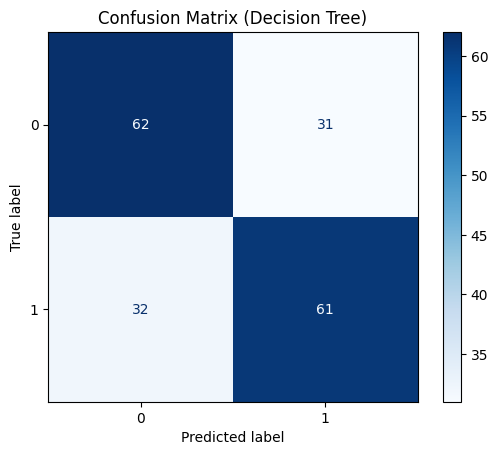


Decision Tree AUC: 0.6613


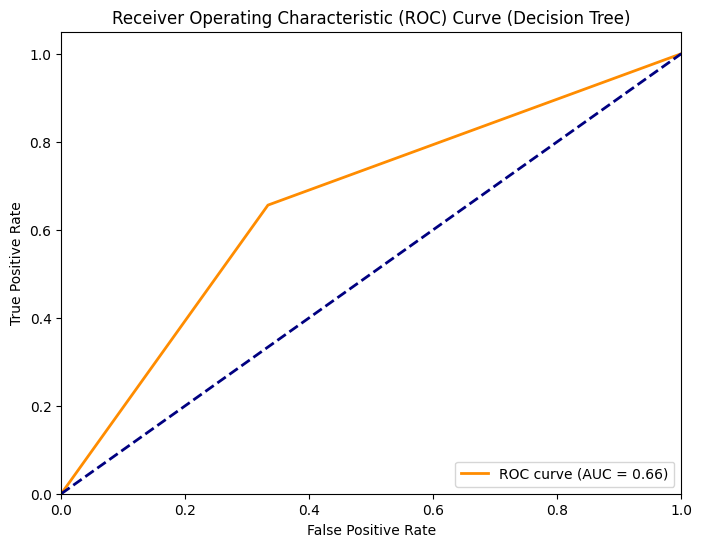


Decision Tree model training and evaluation completed.


In [29]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using decision tree

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# You can tune hyperparameters like criterion ('gini' or 'entropy') and max_depth
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the scaled SMOTEd training data
dt_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
print("\nDecision Tree Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Decision Tree):")
print(cm_dt)

# Plot Confusion Matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# ROC Curve and AUC for Decision Tree
# Get probability scores for the positive class
# Decision Tree can predict probabilities if not pruned too aggressively,
# but tree-based models sometimes struggle with smooth probability estimates.
# Still, we can use predict_proba if available.
if hasattr(dt_model, "predict_proba"):
    y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
    auc_dt = roc_auc_score(y_test, y_prob_dt)

    print(f"\nDecision Tree AUC: {auc_dt:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nDecision Tree model does not support probability prediction.")
    print("Cannot calculate AUC and plot ROC curve.")


print("\nDecision Tree model training and evaluation completed.")



Naive Bayes Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        93
           1       0.67      0.57      0.62        93

    accuracy                           0.65       186
   macro avg       0.65      0.65      0.64       186
weighted avg       0.65      0.65      0.64       186


Confusion Matrix (Naive Bayes):
[[67 26]
 [40 53]]


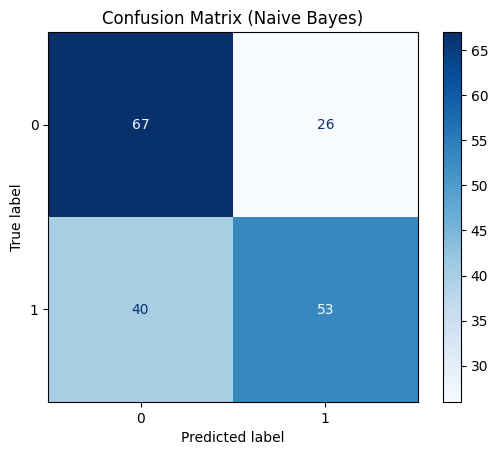


Naive Bayes AUC: 0.7427


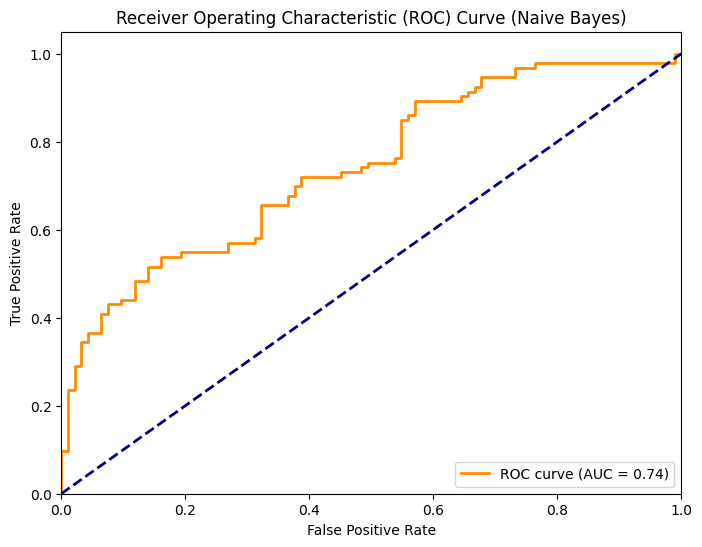


Naive Bayes model training and evaluation completed.


In [30]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using Naive baiyes

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model (Gaussian Naive Bayes is suitable for continuous features)
nb_model = GaussianNB()

# Train the model using the scaled SMOTEd training data
nb_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the Naive Bayes model
print("\nNaive Bayes Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix (Naive Bayes):")
print(cm_nb)

# Plot Confusion Matrix for Naive Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

# ROC Curve and AUC for Naive Bayes
# Get probability scores for the positive class
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

print(f"\nNaive Bayes AUC: {auc_nb:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

print("\nNaive Bayes model training and evaluation completed.")


K Nearest Neighbor Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        93
           1       0.64      0.60      0.62        93

    accuracy                           0.63       186
   macro avg       0.63      0.63      0.63       186
weighted avg       0.63      0.63      0.63       186


Confusion Matrix (K Nearest Neighbor):
[[61 32]
 [37 56]]


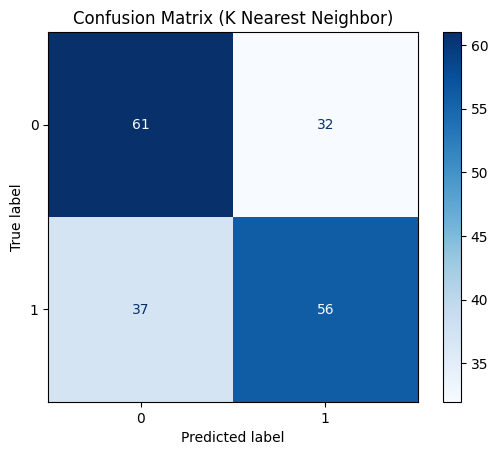


K Nearest Neighbor AUC: 0.6822


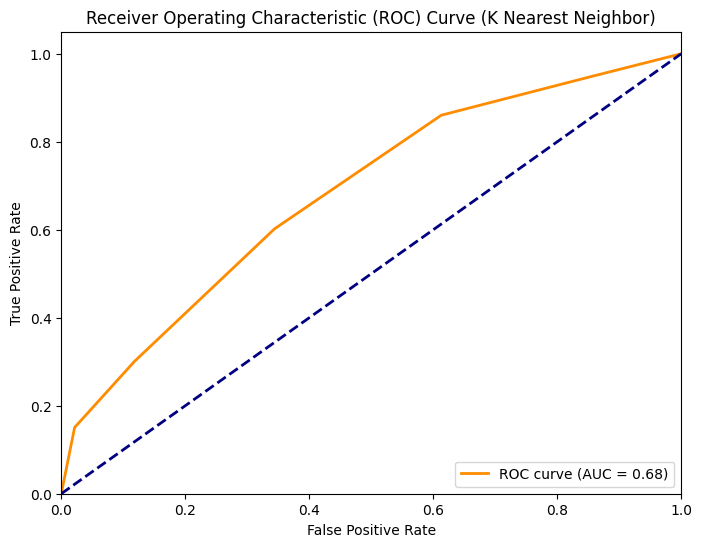


K Nearest Neighbor model training and evaluation completed.


In [31]:
# prompt:  prompt: from the same training and test as the logistic regression, create a machine learning model using K Nearest Neighbor

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K Nearest Neighbor model
# You can tune the number of neighbors (n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5) # Starting with 5 neighbors

# Train the model using the scaled SMOTEd training data
knn_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the K Nearest Neighbor model
print("\nK Nearest Neighbor Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for K Nearest Neighbor
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix (K Nearest Neighbor):")
print(cm_knn)

# Plot Confusion Matrix for K Nearest Neighbor
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (K Nearest Neighbor)')
plt.show()

# ROC Curve and AUC for K Nearest Neighbor
# Get probability scores for the positive class
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

print(f"\nK Nearest Neighbor AUC: {auc_knn:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (K Nearest Neighbor)')
plt.legend(loc="lower right")
plt.show()

print("\nK Nearest Neighbor model training and evaluation completed.")



Starting GridSearchCV for K Nearest Neighbor...
Fitting 5 folds for each of 84 candidates, totalling 420 fits

Best parameters found by GridSearchCV for K Nearest Neighbor:
{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}

Best cross-validation score (ROC AUC) for K Nearest Neighbor:
0.7425497930362794

Evaluation of the best K Nearest Neighbor model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        93
           1       0.64      0.56      0.60        93

    accuracy                           0.62       186
   macro avg       0.63      0.62      0.62       186
weighted avg       0.63      0.62      0.62       186


Confusion Matrix (Tuned K Nearest Neighbor):
[[64 29]
 [41 52]]


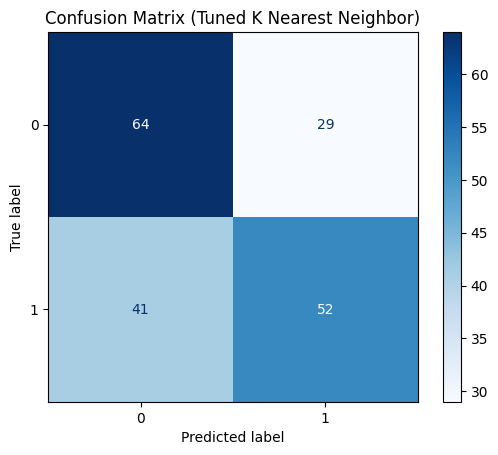


AUC (Tuned K Nearest Neighbor): 0.7220


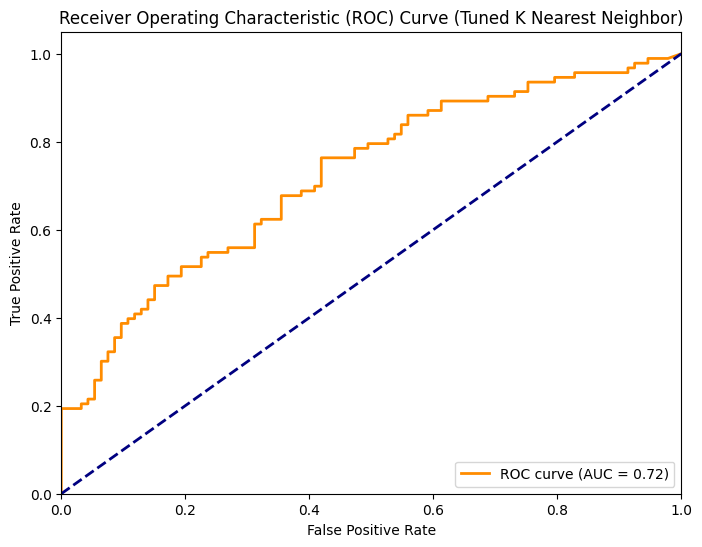


K Nearest Neighbor Hyperparameter tuning completed.


In [36]:
# prompt: From the result of K Nearest Neighbor, do hyper parameter tuning for the machine learning model for K Nearest Neighbor

import matplotlib.pyplot as plt
# --- Hyperparameter Tuning for K Nearest Neighbor using GridSearchCV ---

# Define the parameter grid for GridSearchCV for K Nearest Neighbor
# n_neighbors: Number of neighbors to use. Typically an odd number to avoid ties.
# weights: weight function used in prediction. 'uniform' means all points in the neighborhood are weighted equally. 'distance' weights points by the inverse of their distance.
# metric: distance metric to use. 'minkowski' is a common choice, and with p=2, it becomes the standard Euclidean distance.
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Explore a range of odd neighbors
    'kneighborsclassifier__weights': ['uniform', 'distance'],    # Explore weighting schemes
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'], # Explore distance metrics
    'kneighborsclassifier__p': [1, 2] # Power parameter for Minkowski metric. p=1 is Manhattan, p=2 is Euclidean. Only relevant if metric='minkowski'.
}

# Create a pipeline that includes SMOTE, Scaling, and the KNN model
# It's crucial to scale data before applying KNN, as KNN is distance-based.
# SMOTE should be inside the pipeline to prevent data leakage during cross-validation.
pipeline_knn = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE (essential for KNN)
    ('kneighborsclassifier', KNeighborsClassifier()) # KNN model
])

# Initialize GridSearchCV for K Nearest Neighbor
# cv=5 means 5-fold cross-validation
# scoring='roc_auc' is suitable for imbalanced datasets or when prioritizing ranking performance
grid_search_knn = GridSearchCV(estimator=pipeline_knn,
                               param_grid=param_grid_knn,
                               cv=5,
                               scoring='roc_auc',
                               verbose=2, # Increase verbosity to see progress
                               n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The pipeline handles SMOTE and scaling internally for each fold
print("\nStarting GridSearchCV for K Nearest Neighbor...")
# Use the original X_train and y_train data here. The pipeline will handle resampling and scaling internally.
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best score for KNN
print("\nBest parameters found by GridSearchCV for K Nearest Neighbor:")
print(grid_search_knn.best_params_)
print("\nBest cross-validation score (ROC AUC) for K Nearest Neighbor:")
print(grid_search_knn.best_score_)

# Get the best KNN model from the grid search
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the test set
# The pipeline handles scaling internally for prediction
y_pred_knn_tuned = best_knn_model.predict(X_test)
y_prob_knn_tuned = best_knn_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best K Nearest Neighbor model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_tuned))

# Confusion Matrix for tuned KNN model
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
print("\nConfusion Matrix (Tuned K Nearest Neighbor):")
print(cm_knn_tuned)

# Plot Confusion Matrix for tuned KNN model
disp_knn_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_knn_tuned, display_labels=best_knn_model.classes_)
disp_knn_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned K Nearest Neighbor)')
plt.show()

# ROC Curve and AUC for tuned KNN model
fpr_knn_tuned, tpr_knn_tuned, thresholds_knn_tuned = roc_curve(y_test, y_prob_knn_tuned)
auc_knn_tuned = roc_auc_score(y_test, y_prob_knn_tuned)

print(f"\nAUC (Tuned K Nearest Neighbor): {auc_knn_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_tuned, tpr_knn_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_knn_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned K Nearest Neighbor)')
plt.legend(loc="lower right")
plt.show()

print("\nK Nearest Neighbor Hyperparameter tuning completed.")


DATA UNDERSTANDING

In [21]:
# Buat tabel distribusi deskriptif terpisah berdasarkan HiringDecision
distribution_table =df.groupby('HiringDecision')[[
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany'
]].describe().transpose()
print("Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)")
distribution_table


Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)


HiringDecision                       0           1
Age                 count  1035.000000  465.000000
                    mean     35.137198   35.174194
                    std       9.267177    9.230395
                    min      20.000000   20.000000
                    25%      27.000000   27.000000
                    50%      36.000000   35.000000
                    75%      43.000000   44.000000
                    max      50.000000   50.000000
ExperienceYears     count  1035.000000  465.000000
                    mean      7.313043    8.541935
                    std       4.721302    4.344892
                    min       0.000000    0.000000
                    25%       3.000000    6.000000
                    50%       7.000000    9.000000
                    75%      11.500000   12.000000
                    max      15.000000   15.000000
InterviewScore      count  1035.000000  465.000000
                    mean     47.762319   56.800000
                    std      27.513765   30.065245
                    min       0.000000    0.000000
                    25%      24.000000   31.000000
                    50%      48.000000   62.000000
                    75%      70.000000   83.000000
                    max     100.000000  100.000000
SkillScore          count  1035.000000  465.000000
                    mean     47.110145   60.032258
                    std      29.288227   27.505662
                    min       0.000000    0.000000
                    25%      22.000000   39.000000
                    50%      46.000000   65.000000
                    75%      73.000000   83.000000
                    max     100.000000  100.000000
PersonalityScore    count  1035.000000  465.000000
                    mean     46.059903   56.793548
                    std      28.582168   29.721124
                    min       0.000000    0.000000
                    25%      21.000000   30.000000
                    50%      45.000000   63.000000
                    75%      69.000000   82.000000
                    max     100.000000  100.000000
DistanceFromCompany count  1035.000000  465.000000
                    mean     25.669273   25.140583
                    std      14.649616   14.390860
                    min       1.031376    1.197997
                    25%      13.090216   12.150491
                    50%      25.620088   25.405877
                    75%      38.301204   37.120569
                    max      50.973395   50.992462

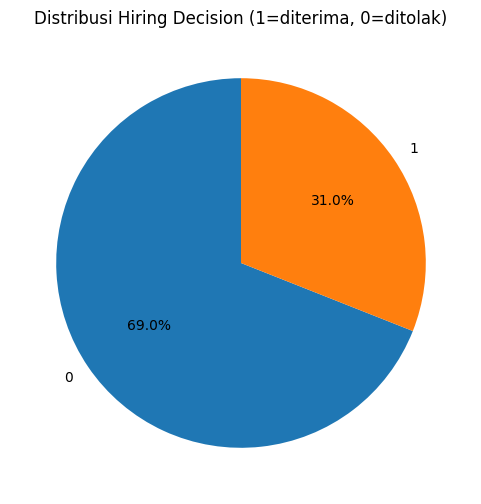

In [22]:
# prompt: make a pie chart from count

import matplotlib.pyplot as plt
# Menghitung jumlah masing-masing HiringDecision
hiring_counts = df['HiringDecision'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(hiring_counts, labels=hiring_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Hiring Decision (1=diterima, 0=ditolak)')
plt.show()

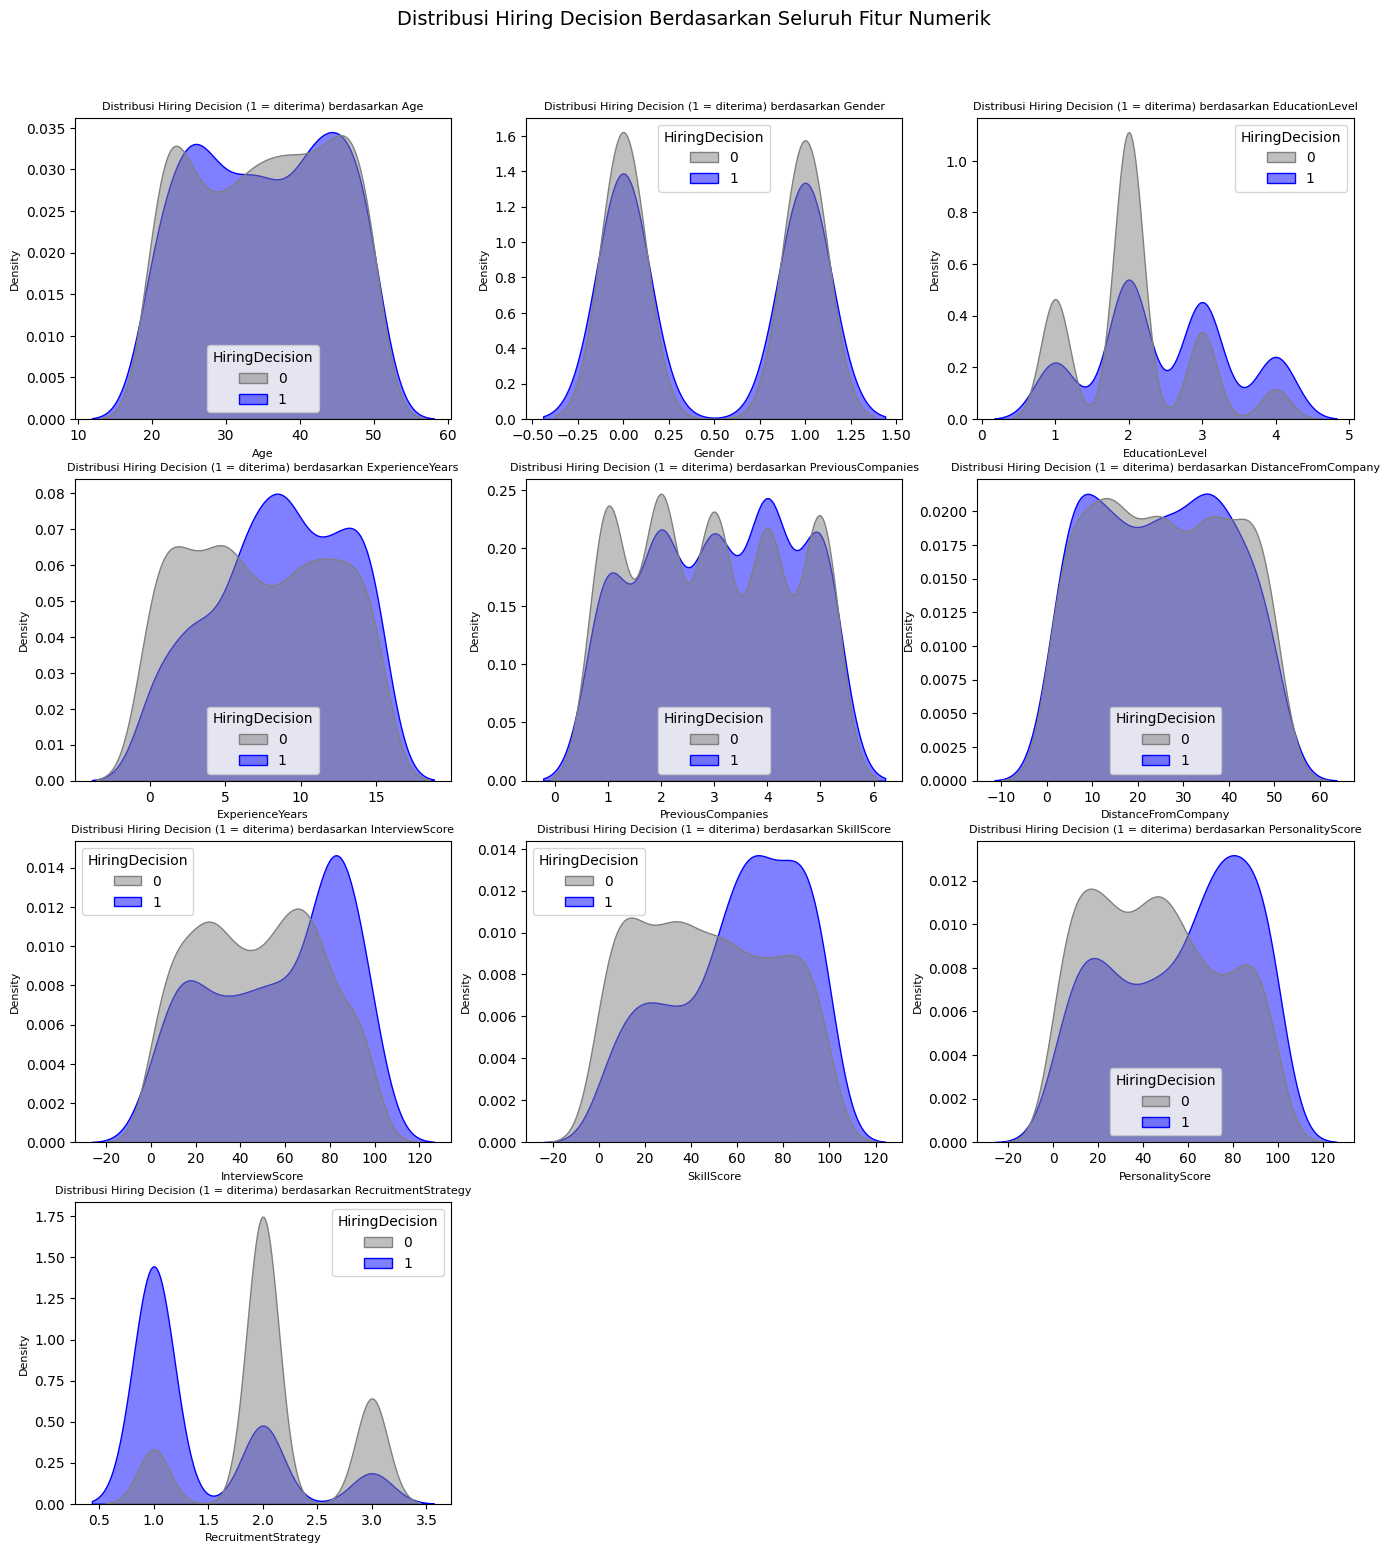

In [23]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols: # Pastikan 'HiringDecision' tidak di-plot sebagai fitur numerik
    numerical_cols.remove('HiringDecision')

if not numerical_cols:
    print("Tidak ada kolom numerik yang ditemukan untuk di-plot distribusinya.")
else:
    # Langkah 3: Menentukan ukuran grid untuk subplot secara dinamis
    num_plots = len(numerical_cols)
    num_cols = 3  # Anda bisa mengubah ini untuk mengatur berapa banyak plot per baris
    num_rows = math.ceil(num_plots / num_cols)

    # Membuat figure dan axes untuk semua subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5.5, num_rows * 4.5))
    axes = axes.flatten() # Meratakan array axes agar lebih mudah diiterasi dalam loop

    # Variabel untuk menyimpan handle dan label legend dari plot pertama
    # Ini akan digunakan untuk membuat satu legend global
    handles, labels = None, None

    custom_palette = {1: 'blue', 0: 'grey'}

    # Langkah 4: Loop melalui setiap kolom numerik dan buat plot KDE
    for i, col in enumerate(numerical_cols):
        if i < len(axes): # Memastikan kita tidak melebihi jumlah subplot yang tersedia
            sns.kdeplot(data=df, x=col, hue='HiringDecision', fill=True,
                        common_norm=False, alpha=0.5, ax=axes[i],palette=custom_palette)
            axes[i].set_title(f'Distribusi Hiring Decision (1 = diterima) berdasarkan {col}', fontsize=8)
            axes[i].set_xlabel(col, fontsize=8)
            axes[i].set_ylabel('Density', fontsize=8)
         # --- BAGIAN PENTING: Mengambil handles dan Menentukan Label Legend Kustom ---
            # Mengambil handles dan label default dari plot yang baru dibuat
            handles, default_labels = axes[i].get_legend_handles_labels()


    # Langkah 5: Hapus subplot yang kosong jika ada (jika jumlah plot tidak pas dengan grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Langkah 6: Tambahkan Legend Tunggal untuk Seluruh Gambar (Figure)
    if handles and labels:
        fig.legend(handles=handles, labels=labels, title='HiringDecision',
                   loc='upper right', bbox_to_anchor=(1.08, 1), # Menempatkan legend di luar area plot utama
                   fontsize=9, title_fontsize=10)

    # Langkah 7: Beri Judul Keseluruhan dan Simpan Plot
    plt.suptitle('Distribusi Hiring Decision Berdasarkan Seluruh Fitur Numerik', y=0.94, fontsize=14)

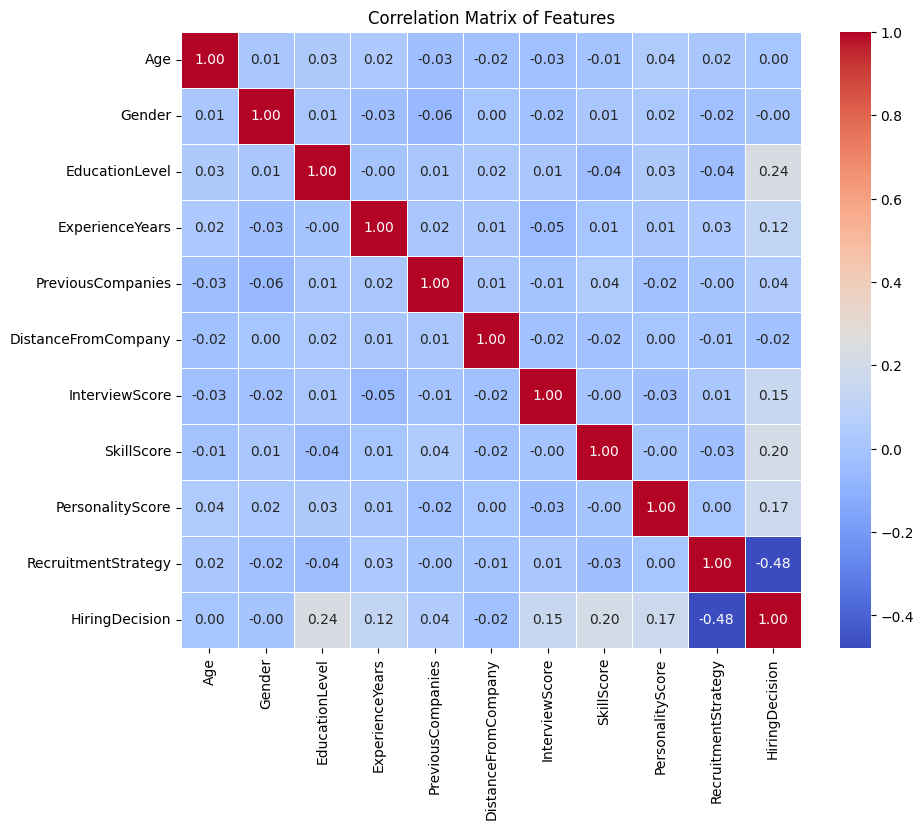

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io # Diperlukan untuk membaca data string ke pandas


# --- Langkah 2: Menghitung Matriks Korelasi ---
# Ini akan menghitung seberapa kuat hubungan antara setiap pasangan kolom numerik.
# Nilai berkisar dari -1 (korelasi negatif kuat) hingga 1 (korelasi positif kuat),
# dan 0 berarti tidak ada korelasi.
correlation_matrix = df.select_dtypes(include=['number']).corr()

# --- Langkah 3: Membuat Heatmap ---
# Heatmap adalah representasi visual dari matriks korelasi.
plt.figure(figsize=(10, 8)) # Mengatur ukuran gambar agar lebih mudah dibaca
sns.heatmap(correlation_matrix,
            annot=True,     # Menampilkan nilai korelasi pada heatmap
            cmap='coolwarm',# Mengatur skema warna (coolwarm adalah pilihan umum)
            fmt=".2f",      # Memformat nilai korelasi menjadi 2 angka desimal
            linewidths=.5)  # Menambahkan garis tipis antar sel

# --- Langkah 4: Memberi Judul dan Menyimpan Plot ---
plt.title('Correlation Matrix of Features') # Judul plot
plt.show()
